<a href="https://colab.research.google.com/github/ShreeKeshavan/Car_price_prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Dictonary**

1. Symboling : Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. associated with a particular car model.
2. normalized-losses : Normalized losses refer to the average loss payment per insured vehicle
3. make : Name of car company
4. fuel-type : Car fuel type 
5. aspiration : Aspiration used in the car
6. num-of-doors : Number of doors in a car
7. body-style : Shape and layout of the car's exterior of the car
8. drive-wheels : Type of drive wheel
9. engine-location : Location of the car engine
10. wheel-base : Weelbase of the car 
11. length : Length of the car
12. width : Width of the car
13. height : Height of the car
14. curb-weight : The weight of a car without occupants or baggage
15. engine-type : Type of engine
16. num-of-cylinders : Cylinders placed in the car
17. engine-size : Size of the car engine 
18. fuel-system : Fuel system of the car
19. bore : Boreratio of the car
20. stroke : Stroke length of the engine the distance that the piston travels inside the engine cylinder.
21. compression-ratio : Compression ratio of car
22. horsepower : Horsepower of the car
23. peak-rpm : The peak revolutions per minute of an engine of the car
24. city-mpg : Car's mileage in the city
25. highway-mpg : Car's mileage on highway
26. price : Price of the car


* Based on the data and data dictionary, We have prediction / regression problem.

* We wil make prediction on the target variable "price"

* And we will build a model to get best prediction on the price variable.

* For that we will use MSE(Root Mean Squared Error) and R2

In [229]:
# Import all the Required libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# visualisation modifiers
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(style = 'darkgrid',font_scale=1.5)
%matplotlib inline

# To supress warnings
import warnings
warnings.filterwarnings("ignore")

# **Data Understanding**

In [230]:
# To read the CSV file
df = pd.read_csv('/content/cars_price.csv')

In [231]:
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [232]:
# Shape of the data :
df.shape

(205, 26)

In [233]:
# Dataframe information :
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

* From above output we can observe that 16 categorical & 11 numerical Attributes.
* All the features are not having correct data-types. So we need to analyse the reason.
* All the features are not having correct data-types because of unknown in tha data frame filled with "?" symbol

In [234]:
# Describing the data :
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


# **Data Cleaning**

In [235]:
# To check duplicates
df.duplicated().sum()

0

 * From the above output we can say that there is no duplicate records present in our dataset.

In [236]:
# To find all the unique values in the column
for col in df.select_dtypes(exclude= np.number).columns:
  print(f'{col} : {df[col].unique()}' )
  print('-----------------------------------------------------')

normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
-----------------------------------------------------
make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
-----------------------------------------------------
fuel-type : ['gas' 'diesel']
-----------------------------------------------------
aspiration : ['std' 'turbo']
-----------------------------------------------------
num-of-doors : ['two' 'four' '?']
-----------------------------------------------------
body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
------------------------

In [237]:
df.nunique()

symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60
peak-rpm              24
city-mpg              29
highway-mpg           30
price                187
dtype: int64

* There is no zero variance variable

In [238]:
# To check null values
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

* There are no null values currently because the null values are all filled with "?" symbols.

In [239]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [240]:
#to count the '?' or unknown values present in the dataframe 
has_question_mark = df == "?"
columnwise_results = has_question_mark.sum()
columnwise_results

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [241]:
df.drop('normalized-losses',axis=1,inplace=True)

In [242]:
#converting "?" values to null 
df.replace("?", np.nan, inplace=True)

In [243]:
#total null values in the data set
df.isnull().sum().sum()

18

In [244]:
df = df.fillna(method='ffill')

In [245]:
df.isnull().sum()

symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [246]:
print(df.dtypes)

symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


* Many numerical columns are in obj type lets convert them

In [247]:
# Converting Obj dtype Numerical columns into Numerical column
columns_to_convert_int = df[['horsepower','peak-rpm']]
for col in columns_to_convert_int:
    df[col] = df[col].astype(int)

columns_to_convert_float = df[['bore','stroke','price']]
for col in columns_to_convert_float:
    df[col] = df[col].astype(float)

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   fuel-type          205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

# **Exploratory Data Analysis (EDA)**

### **Visualizing our Target Feature**

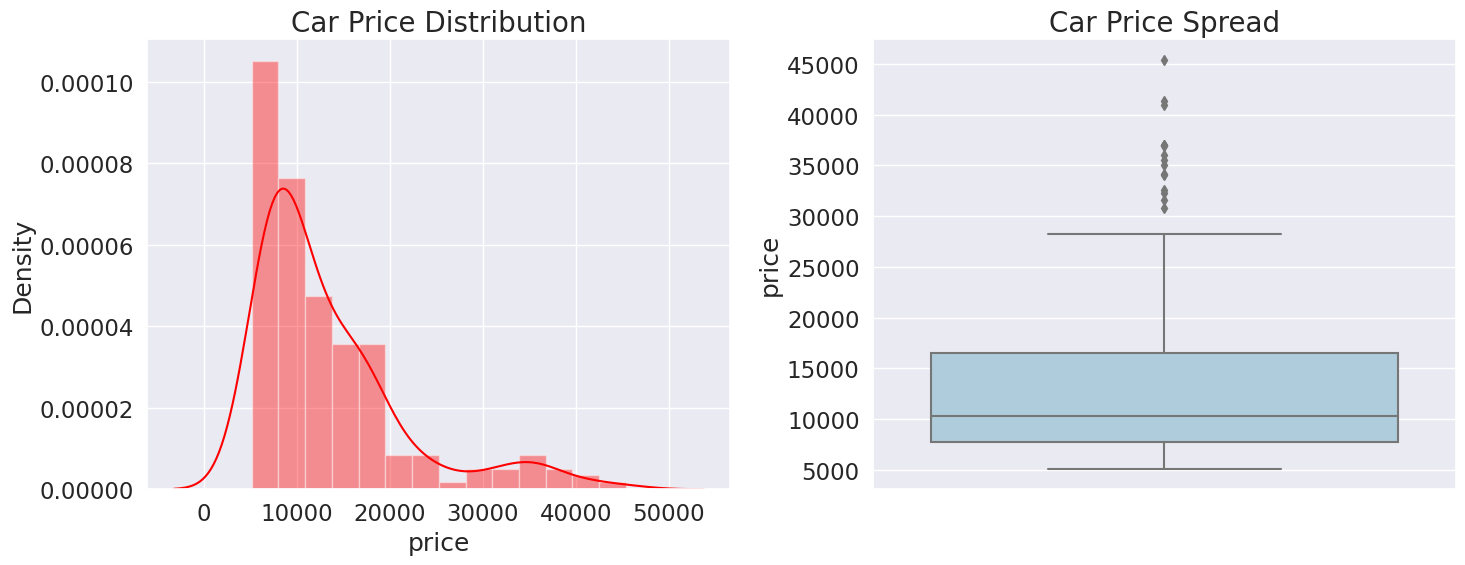

In [249]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Paired")
plt.title("Car Price Spread",fontsize=20)
plt.tight_layout() # to adjusts the spacing between subplots
plt.show()

In [250]:
df["price"].agg(["min","mean","median","max","std","skew"]).to_frame()

,price
min,5118.000000
mean,13312.712195
median,10295.000000
max,45400.000000
std,8102.472461
skew,1.766400


 **Insights**

* We can clearly observe that our Car Price Feature is Right Skewed.
* We can clearly observe that there is a significant difference between mean & median value.
* We can also make an insight that most of the car's price is below 14000.
* We can also say that the skewness of the car price is above 1.5 which means that the data points are highly spread.

## **Visualizing Categorical columns**

In [251]:
cat_cols = df.select_dtypes(exclude=[np.number])
cat_cols.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


### **Visualizing Total No. of cars sold by different company**

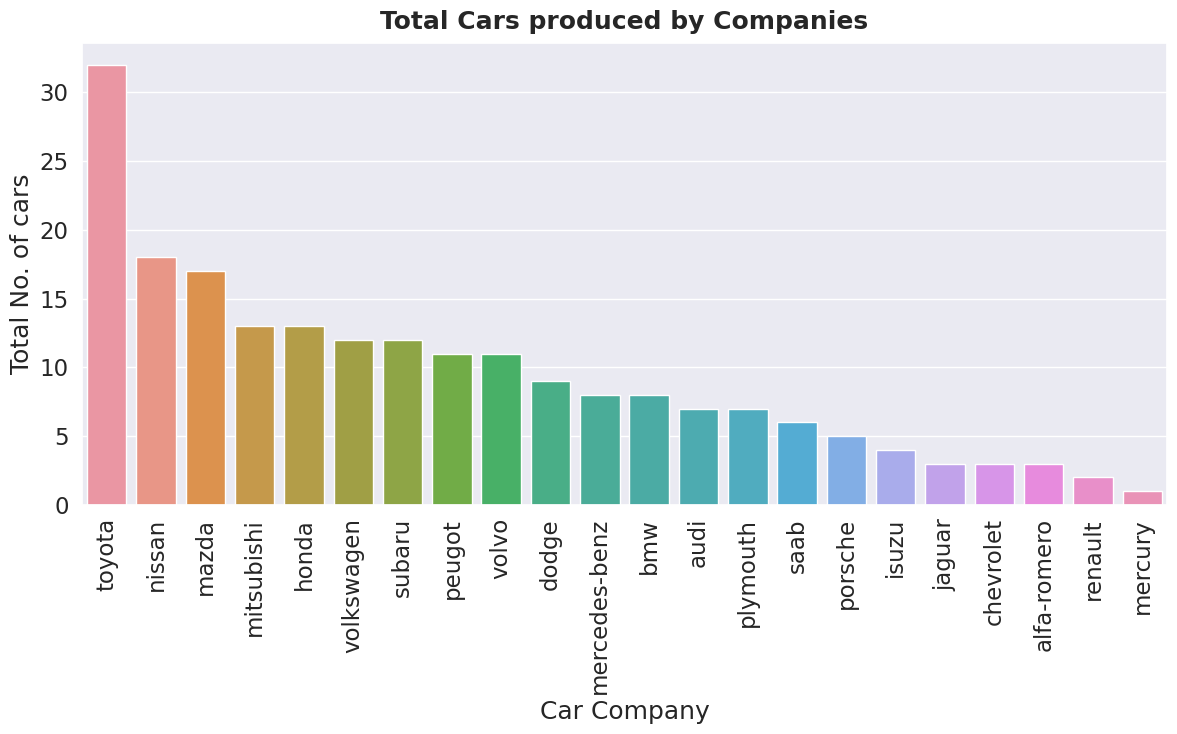

In [252]:
plt.figure(figsize=(14,6))
cars = df["make"].value_counts()
sns.barplot(x=cars.index, y=cars.values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars")
plt.title("Total Cars produced by Companies", pad=10, fontweight="black")
plt.xticks(rotation=90)
plt.show()

**Insights**
* Toyota seems to be the most favoured cars.
* Mercury seems to be the least favoured cars.
* So we can say that Toyota is kind of customers most favoured company.
Nisaan ,Mercury or renault are having very low data-points. So we can't make any inference of least sold car companies.

### **Visualizing Car Company with Price**

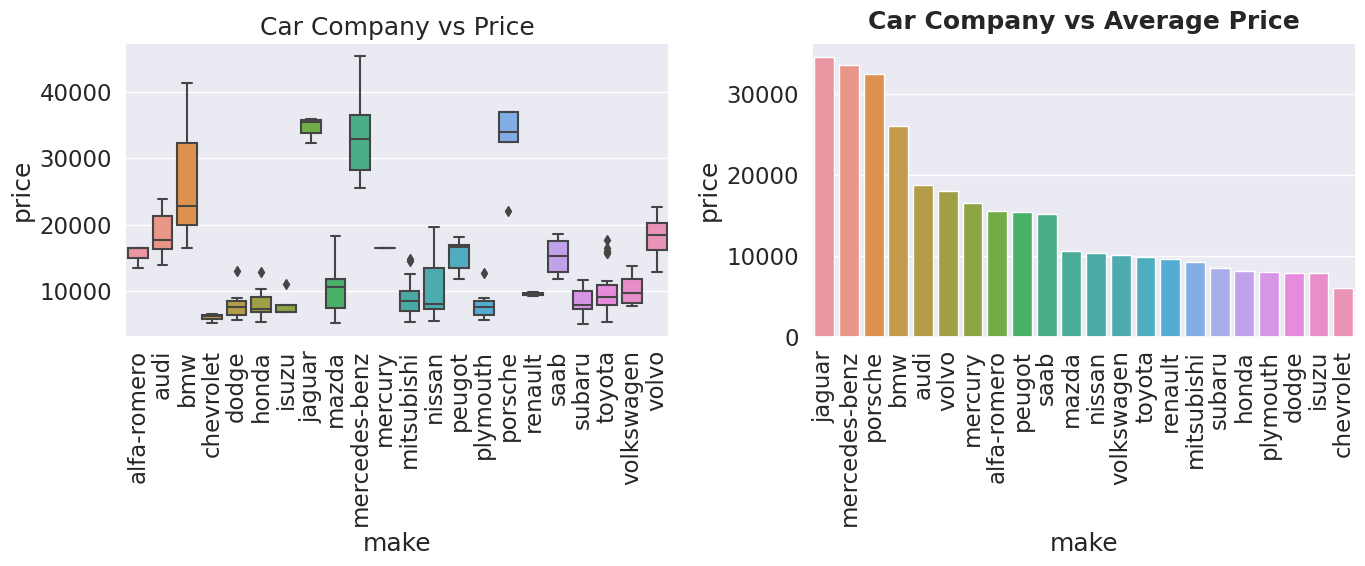

In [253]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='make', y='price', data=df)
plt.xticks(rotation=90)
plt.title("Car Company vs Price")

plt.subplot(1,2,2)
x = pd.DataFrame(df.groupby('make')['price'].mean().sort_values(ascending=False))
sns.barplot(x=x.index,y="price",data=x) 
plt.xticks(rotation=90)
plt.title("Car Company vs Average Price", pad=10, fontweight="black")

plt.tight_layout()
plt.show()

**Insights**

* Jaguar & mercedes-benz seems to have the highest price range cars.
* Chevrolet seems to have the lowest price range cars.

In [254]:
# Function to visualize categorical features

def Categorical_visualization(col):
  plt.figure(figsize=(20,8))
  plt.subplot(1,3,1)
  sns.countplot( x=col, data=df, palette='Paired', order= df[col].value_counts().index)
  plt.title( f'{col} Distribution', pad= 20, fontweight= 'black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,2)
  sns.boxplot(x= col, y='price', data=df, palette='Paired')
  plt.title(f'{col} Vs Price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.subplot(1,3,3)
  x = pd.DataFrame(df.groupby(col)['price'].mean().sort_values(ascending=False))
  sns.barplot( x= x.index, y= 'price', data=x, palette='Paired')
  plt.title( f'{col} Vs Average price', pad=20, fontweight='black', fontsize=20)
  plt.xticks(rotation=90)

  plt.tight_layout()
  plt.show()

### **Visualizing Car Fuel Type Feature**

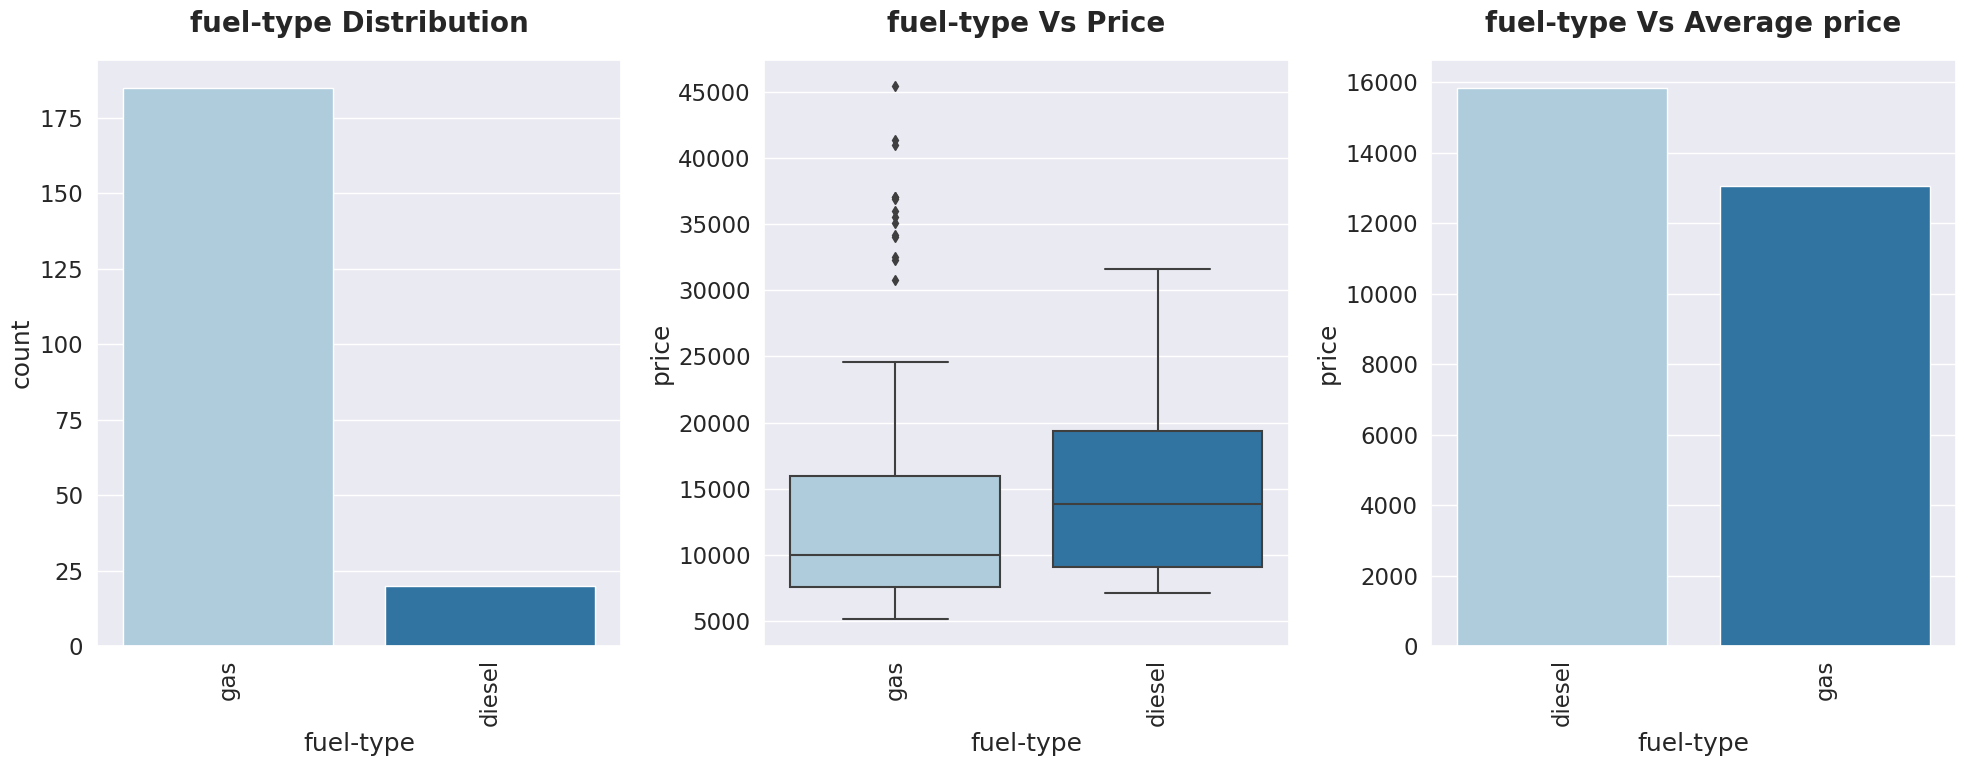

In [255]:
Categorical_visualization('fuel-type')

**Insights**
* We can clearly make an inisght that Cars having gas fuel system is mostly sold.
* From the second plot we can make an insight that Gas Fuel Sysytem cars are availabe within every price range.
* Both type of fuel cars are having most of the cars price near to average price of the cars. But the gas Fuel Type cars are having cars with high prices also.
* From the third plot we can make an inisght that the Average price of gas fuel type cars are less than diesel fuel type cars.

* So we can say that customers prefer those cars which consumes less price in fuels.

### **Visualizing Aspiration Feature**

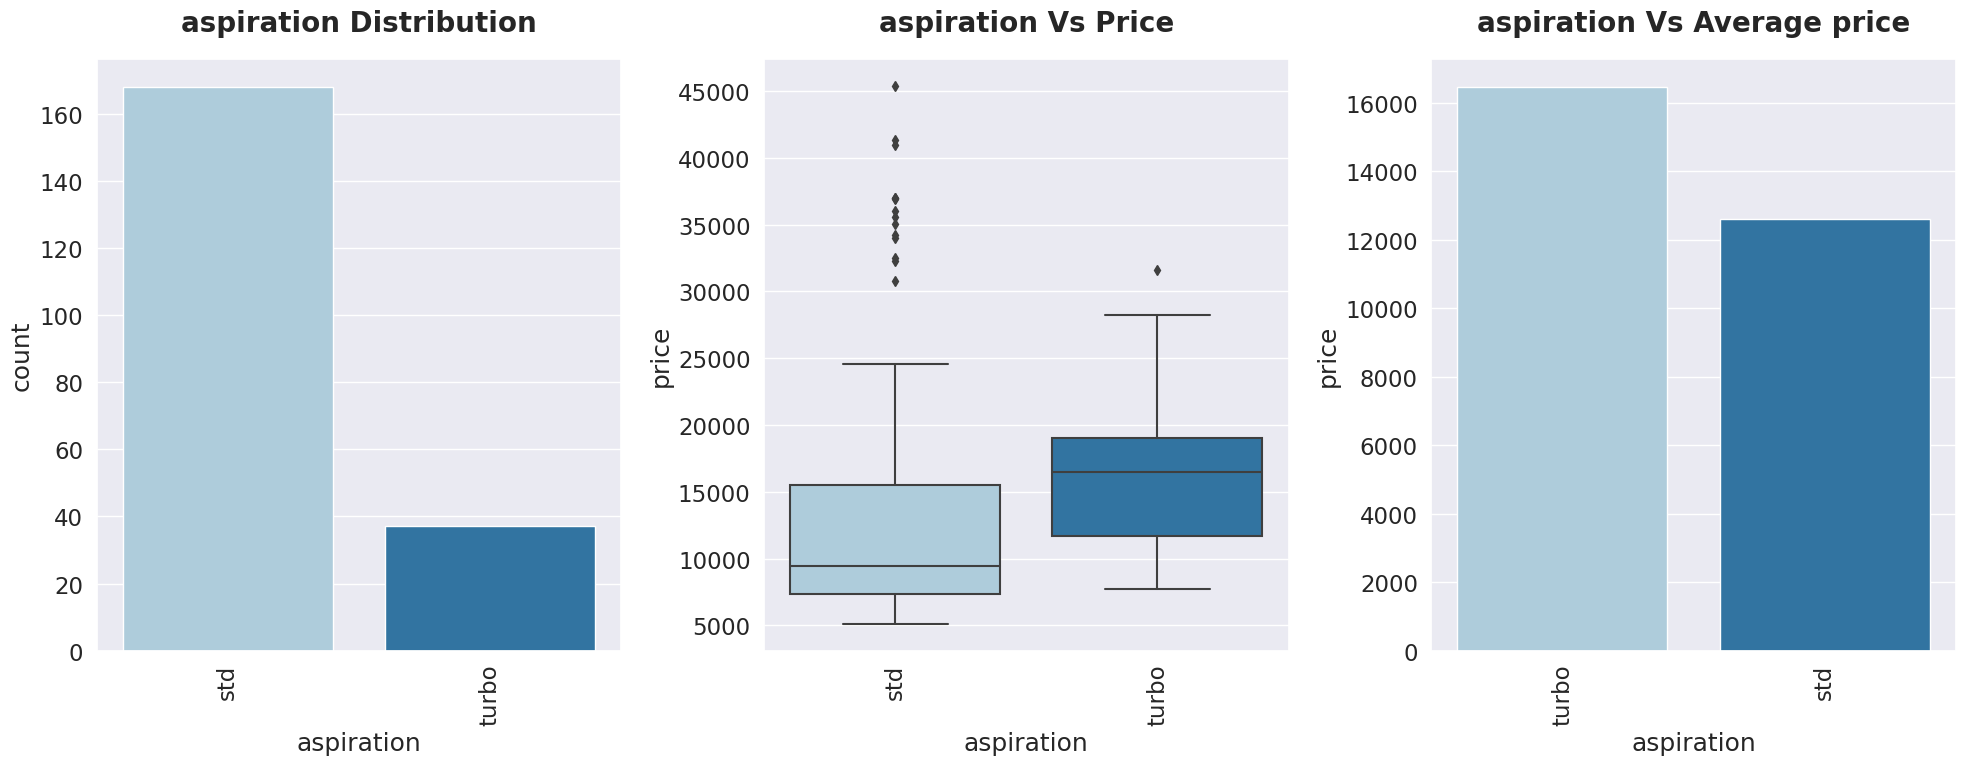

In [256]:
Categorical_visualization('aspiration')

**Observation**

* Cars having STD Aspiration are highly sold when compared with Turbo Aspiration.
* Cars having Turbo Aspiration have higher price range than the STD Aspiration.

**Insights**

* Outliers present in STD Aspiration states that some of the cars having std aspiration are expensive too.

### **Visualizing No-of-doors Feature**

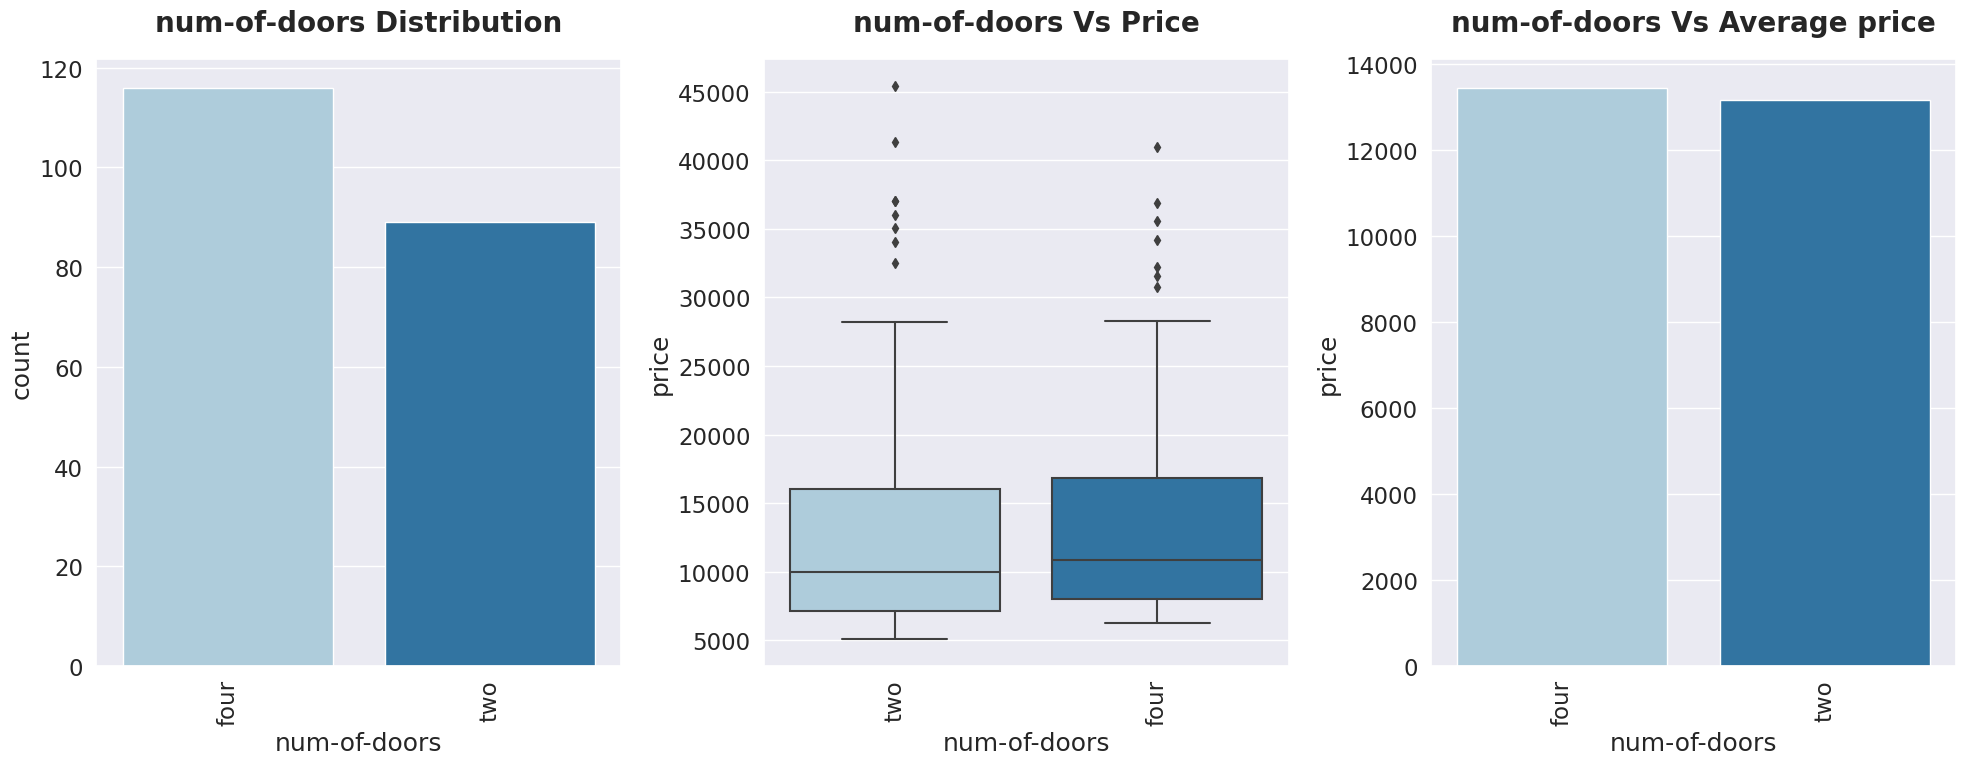

In [257]:
Categorical_visualization('num-of-doors')

**Observation**

* Cars having Four Doors are mostly sold when compared with cars having Two Doors.
* Cars having Fours Doors are little more expensive when we compare the avergae price of cars having two doors or four doors.

**Insights**

* Cars having Four Doors are mostly sold. But there's not a big difference between the sales of cars having four doors & two doors..

* Outliers prsesent in two doors cars states that some of the cars are are more expensive than the cars having four doors

* Door numbers category is not affecting the price that much.

### **Visualizing Body-style Feature**

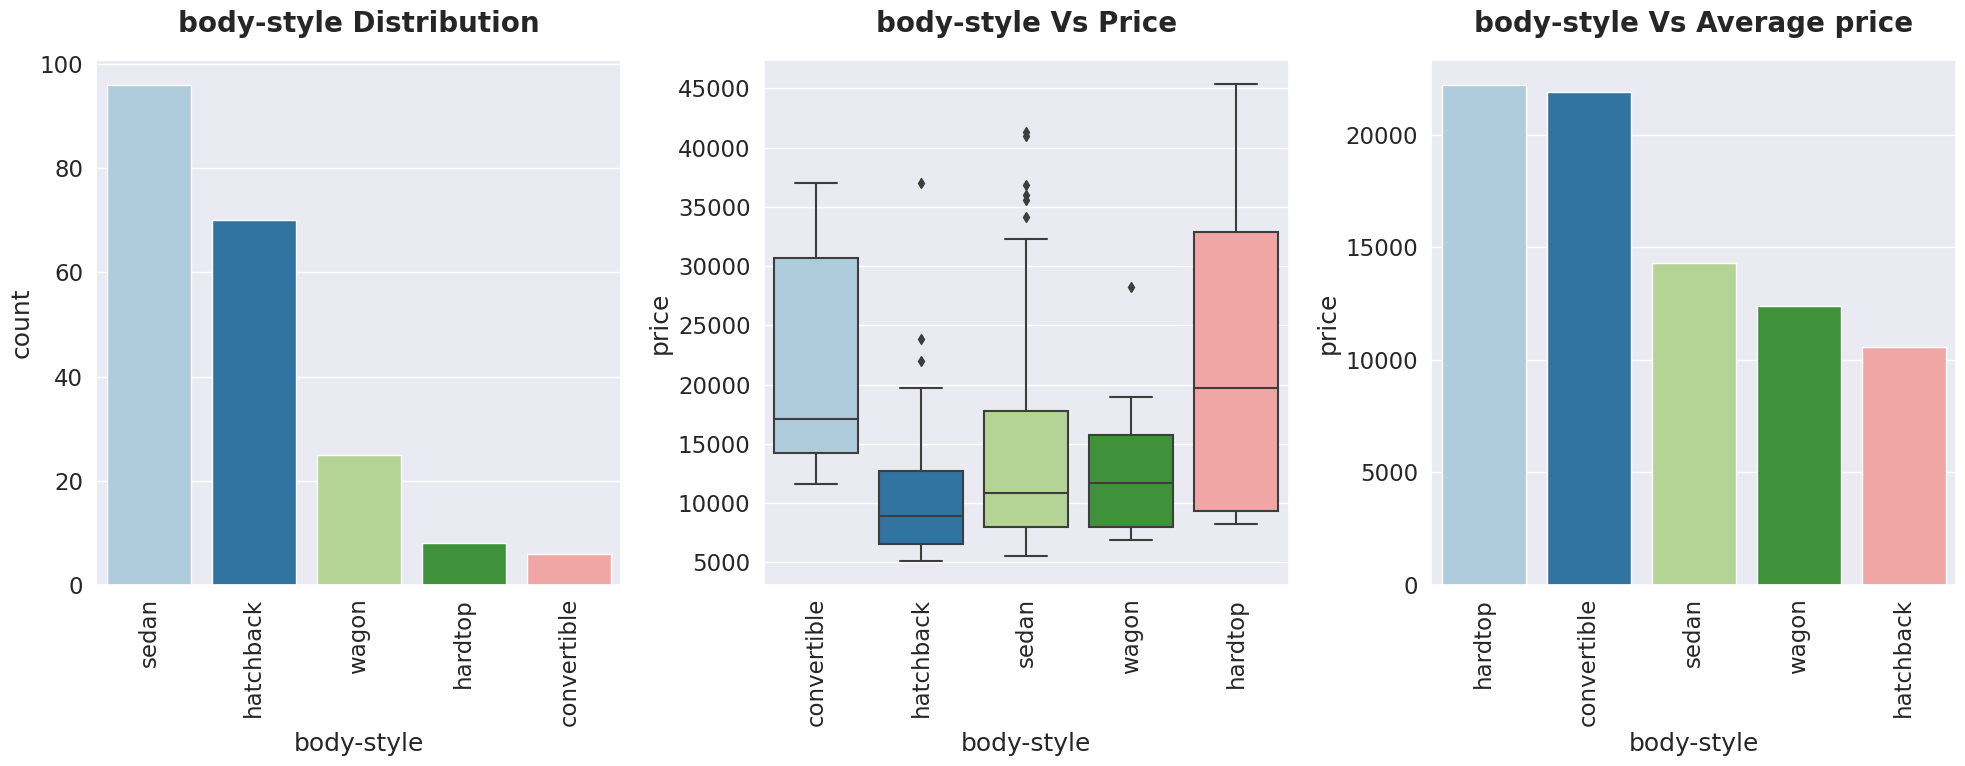

In [258]:
Categorical_visualization('body-style')

**Obseravtion**

* Cars having sedan body-type are mostly sold followed by hatchback.
* Cars having convertible or hardtop body-type are less sold.
* Cars having Hardtop body-type is the mostly expensive cars followed by convertible.

**Insights**

* Convertible & Hardtop body-types are less sold because they are very expensive cars. So most of the customers couldn't prefer it.
* Cars having Sedan body-type is the third most expensive car. But still its having the most number of car sales. So we can say customers prefer medium price range cars.

### **Visualizing Drive-wheels Feature**

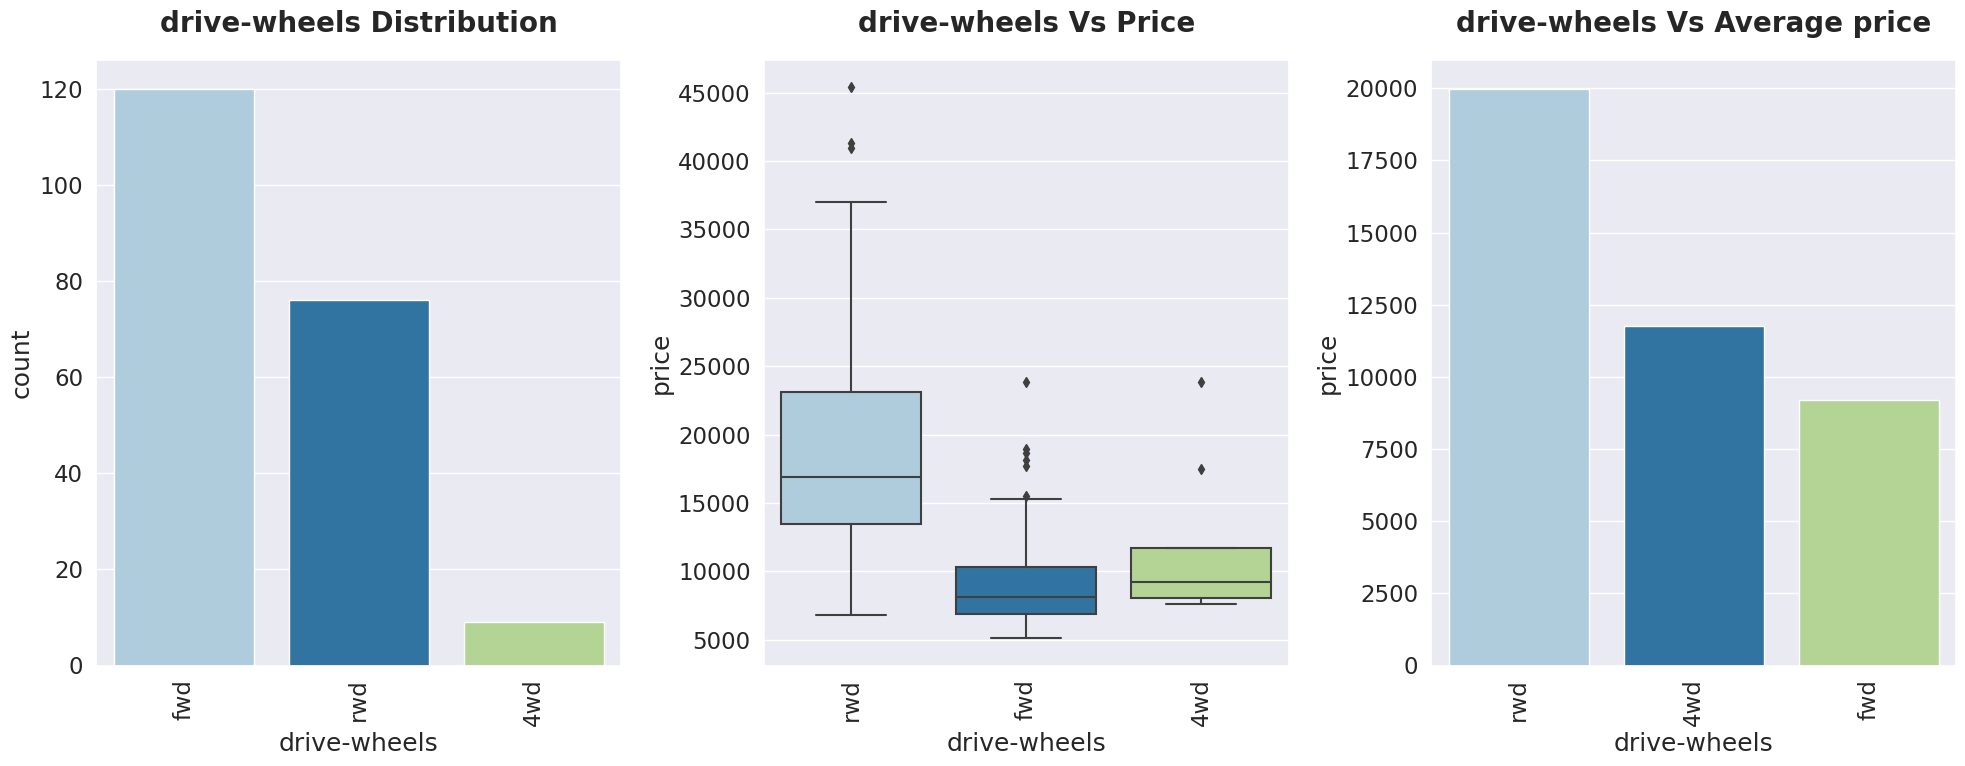

In [259]:
Categorical_visualization('drive-wheels')

**Observation**
*  Most of the cars which are sold are having Front Wheel Drive (FWD) followed by Rear Wheel Drive (RWD).
* Cars having Rear Wheel Drive are mostly expensive cars. But cars having Front Wheel Drive are the cheapest.

**Insights**
* We can make an insight that the high rated cars must be using Rear Wheel Drive.
* Cars with low prices must be using Forward Wheel Drive

### **Visualizing Engine-location Feature**

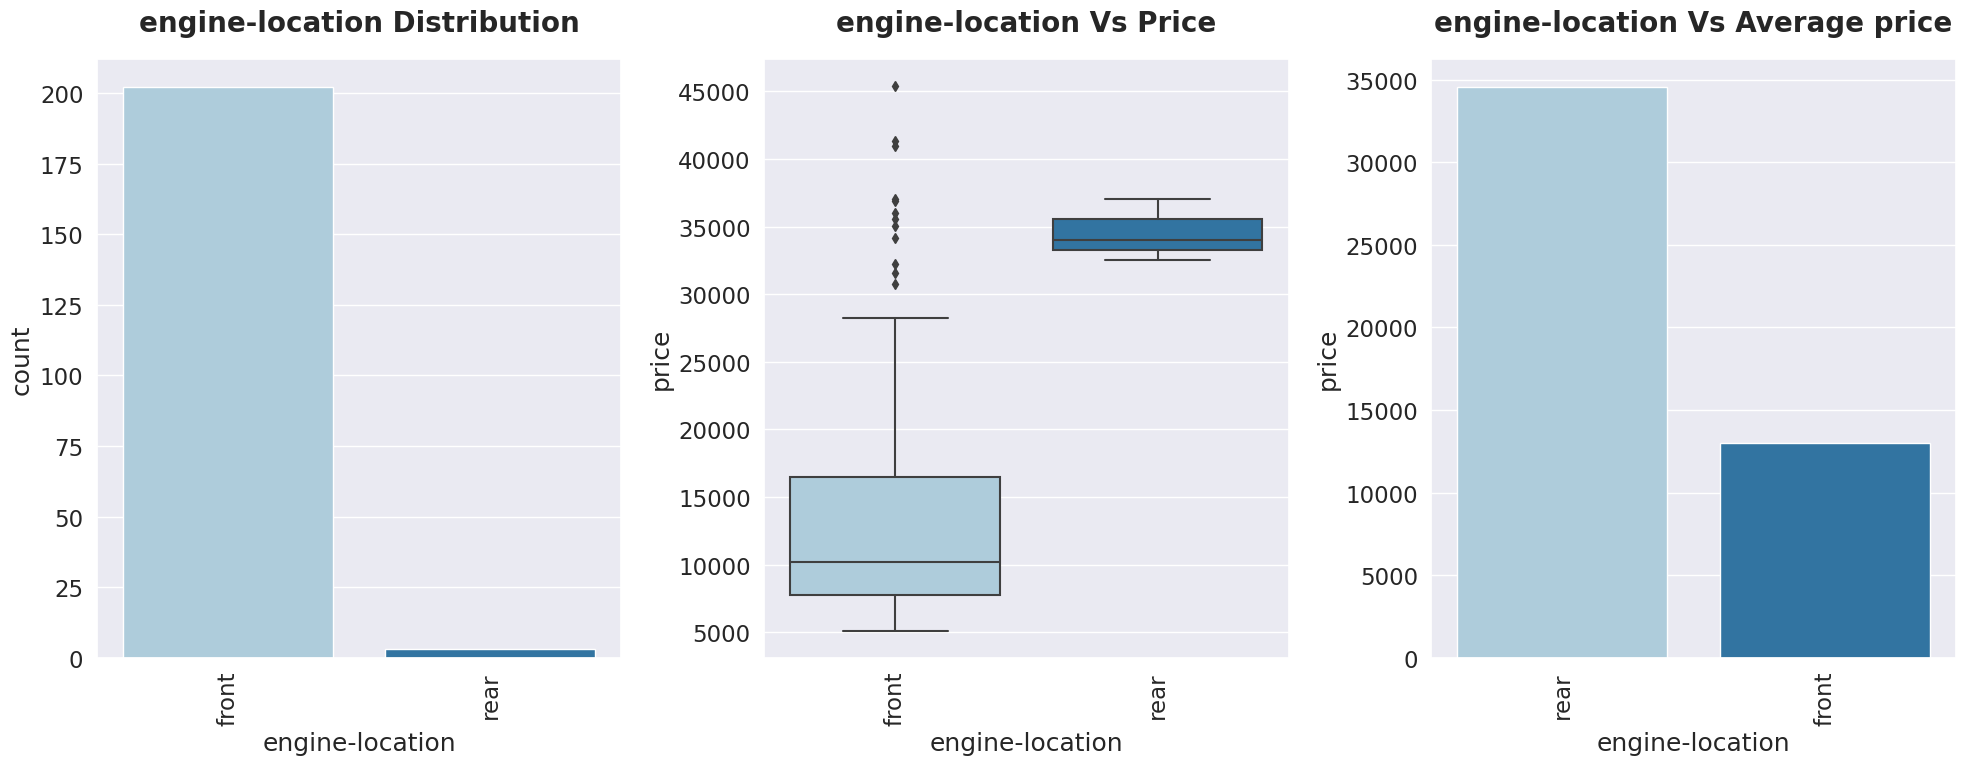

In [260]:
Categorical_visualization('engine-location')

In [261]:
df[df["engine-location"]=="rear"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
126,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,32528.0
127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,34028.0
128,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.9,9.5,207,5900,17,25,37028.0


**Observation**

* Most of the cars are having engine location in front.

**Insights**

* Note there are only 3 data-points for the rear category.
* So we can't make any inference of car price when compared with engine location.
* If we want we can drop this feature before training as it may lead to overfitting.

### **Visualizing Engine-type Feature**

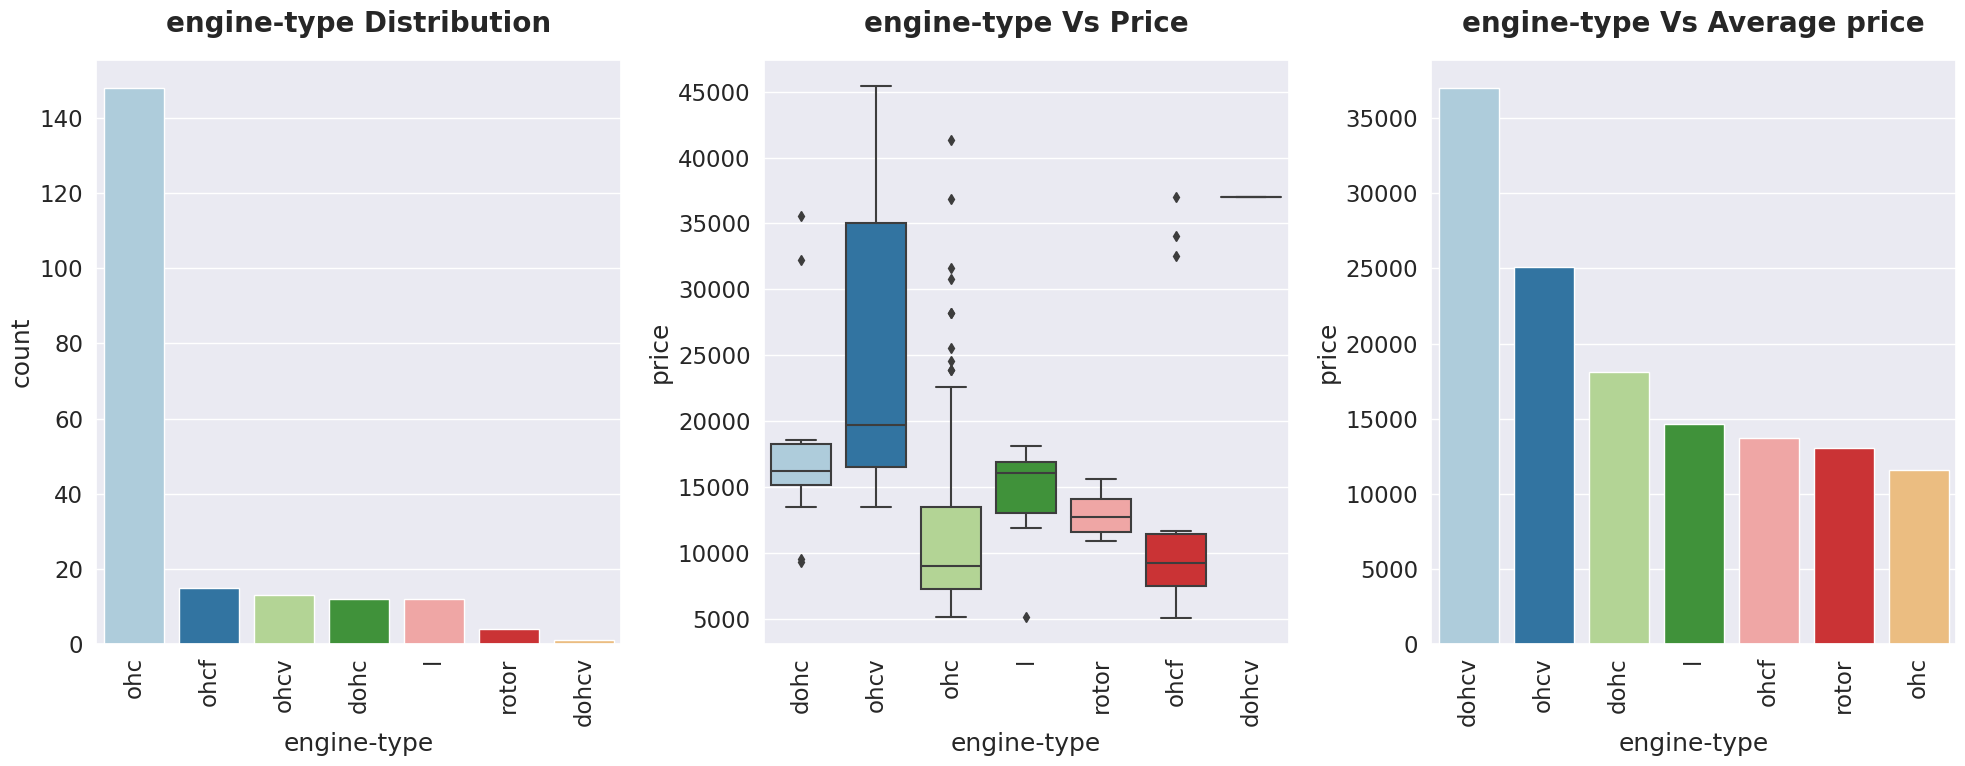

In [262]:
Categorical_visualization('engine-type')

In [263]:
df[df["engine-type"]=="dohcv"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
129,1,porsche,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,37028.0


**Insights**
* Cars having Overhead Camshaft (OHC) engines are mostly sold.
* Only one car has been sold having engine type dohcv.
* There are very few data-points of engine type dohcv & rotor. So we can say that cars having ohcv engine types are mostly expensive.
* Cars hvaing Overhead Camshaft (OHC) engines are least expensive cars.

### **Visualizing Num-of-cylinders Feature**

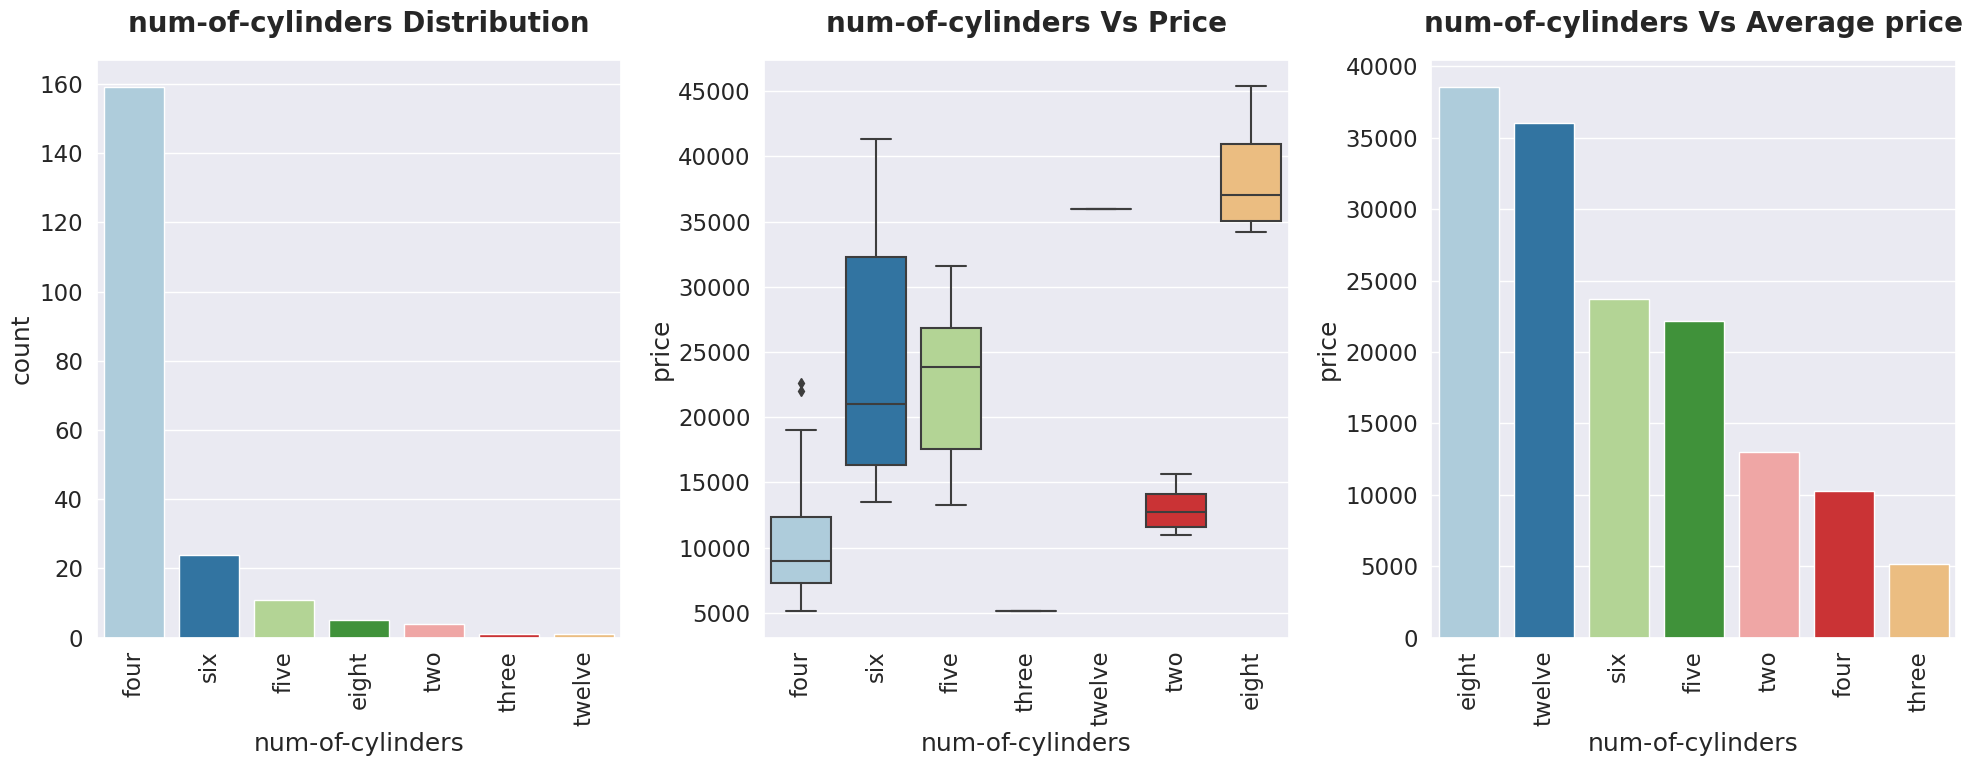

In [264]:
Categorical_visualization('num-of-cylinders')

In [265]:
df[df['num-of-cylinders'] == 'three']

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
18,2,chevrolet,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0


In [266]:
df[df['num-of-cylinders'] == 'twelve']

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
49,0,jaguar,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


**Insights**

* Most of the cars are having Four cyclinders followed by cars having six cyclinders.
* There are only one data-point each for car having Three & Twelve data-points.
Cars having eight cyclinders are most expensive cars followed by six cyclinders.

### **Visualizing Fuel-system Feature**

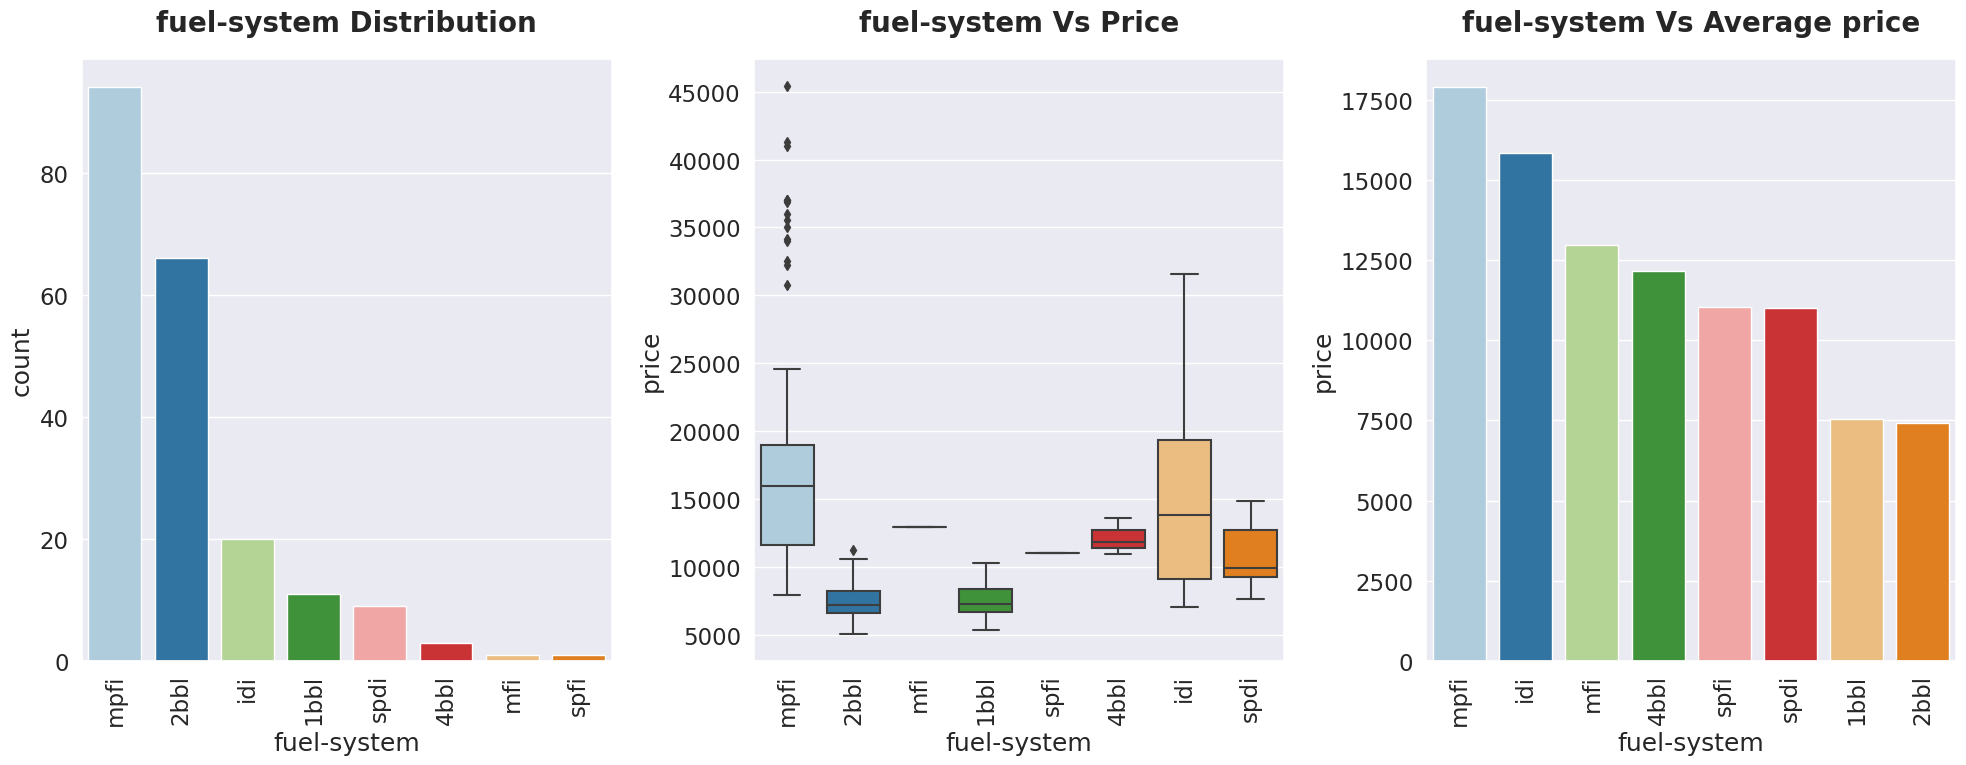

In [267]:
Categorical_visualization('fuel-system')

In [268]:
df[df["fuel-system"]=="mfi"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
29,3,dodge,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.6,3.9,7.0,145,5000,19,24,12964.0


In [269]:
df[df["fuel-system"]=="spfi"]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
46,2,isuzu,gas,std,two,hatchback,rwd,front,96.0,172.6,65.2,51.4,2734,ohc,four,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048.0


**Insight**
* Most of the cars are having mpfi & 2bbl fuelsystems.
* Cars having mpfi fuel system are the expensive cars followed by idi fuel system cars.
* There are only one data-point for each mfi and spfi fuelsystem cars. So we can make any further inference.

### **Visualizing Symboling Feature**

* The symboling represents the degree to which the car is riskier than its price suggests.
* It ranges from -3 to +3, with higher negative values indicating higher risk and higher positive values indicating lower risk.
* In other words, a car with a symboling of -3 is considered riskier than a car with a symboling of +3, and is likely to have a lower price as a result.

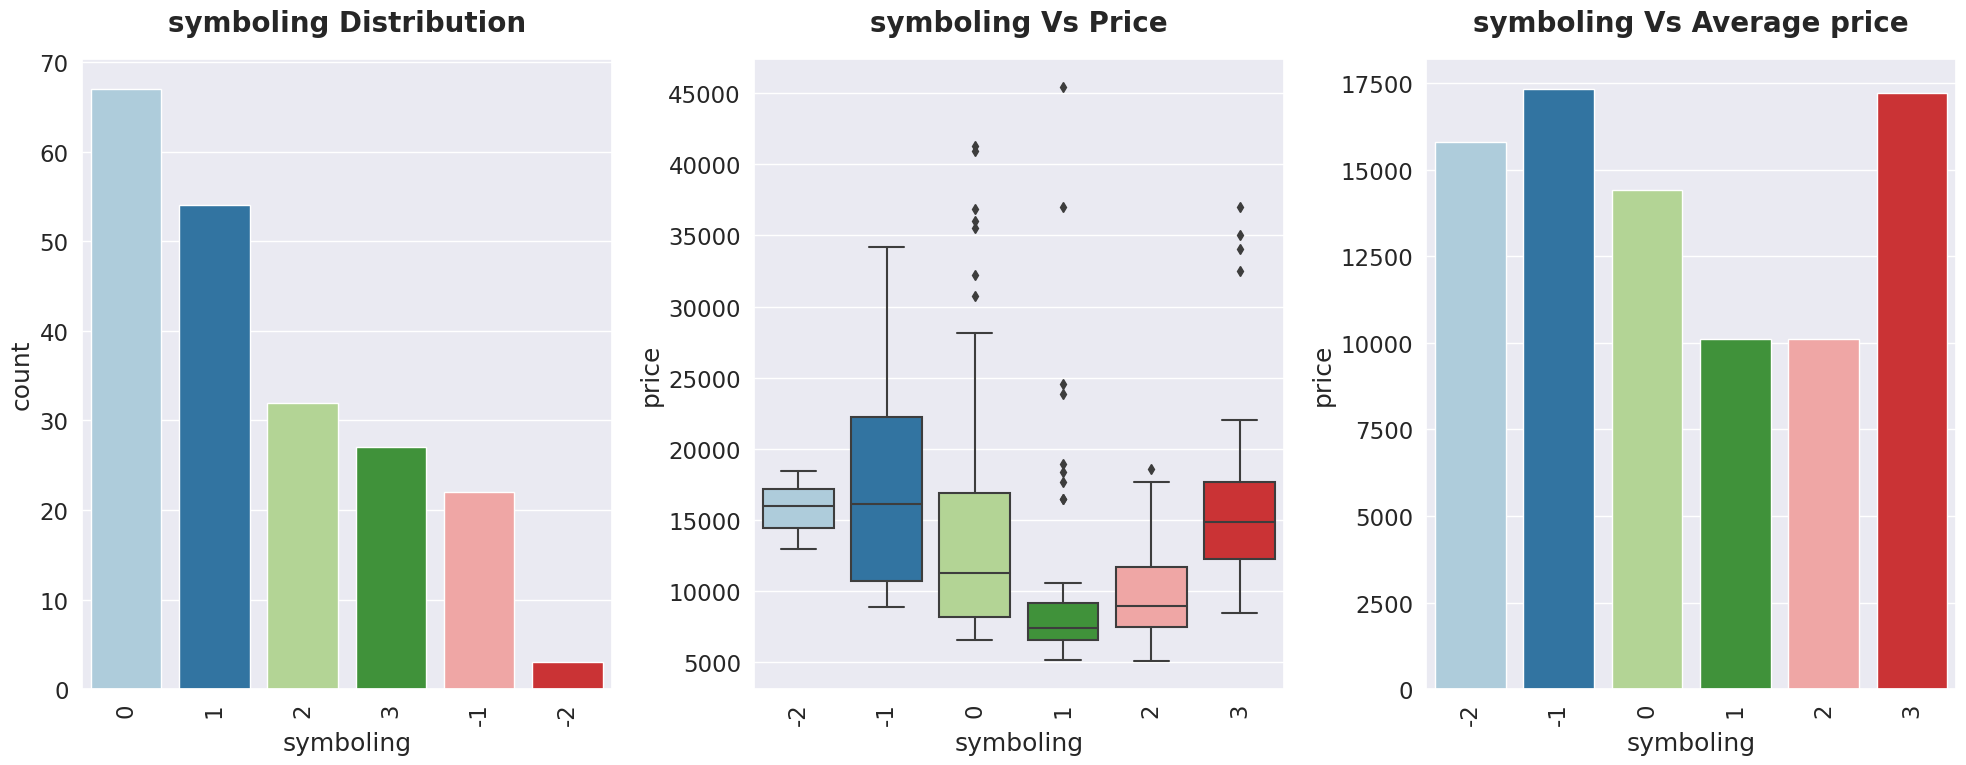

In [270]:
Categorical_visualization('symboling')

**Insights**
* We can clearly observe cars having symboling 0 or 1 are motly preferred.
* We can aslo observe that symboling -1, 0, 3 are expensive.

## **Visualizing Numerical Features**

In [271]:
num_cols = df.select_dtypes(include =[np.number])
num_cols.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [272]:
# # Pairplot of all numerical features
# plt.figure(figsize = (30,30))
# sns.pairplot(num_cols)
# plt.show()

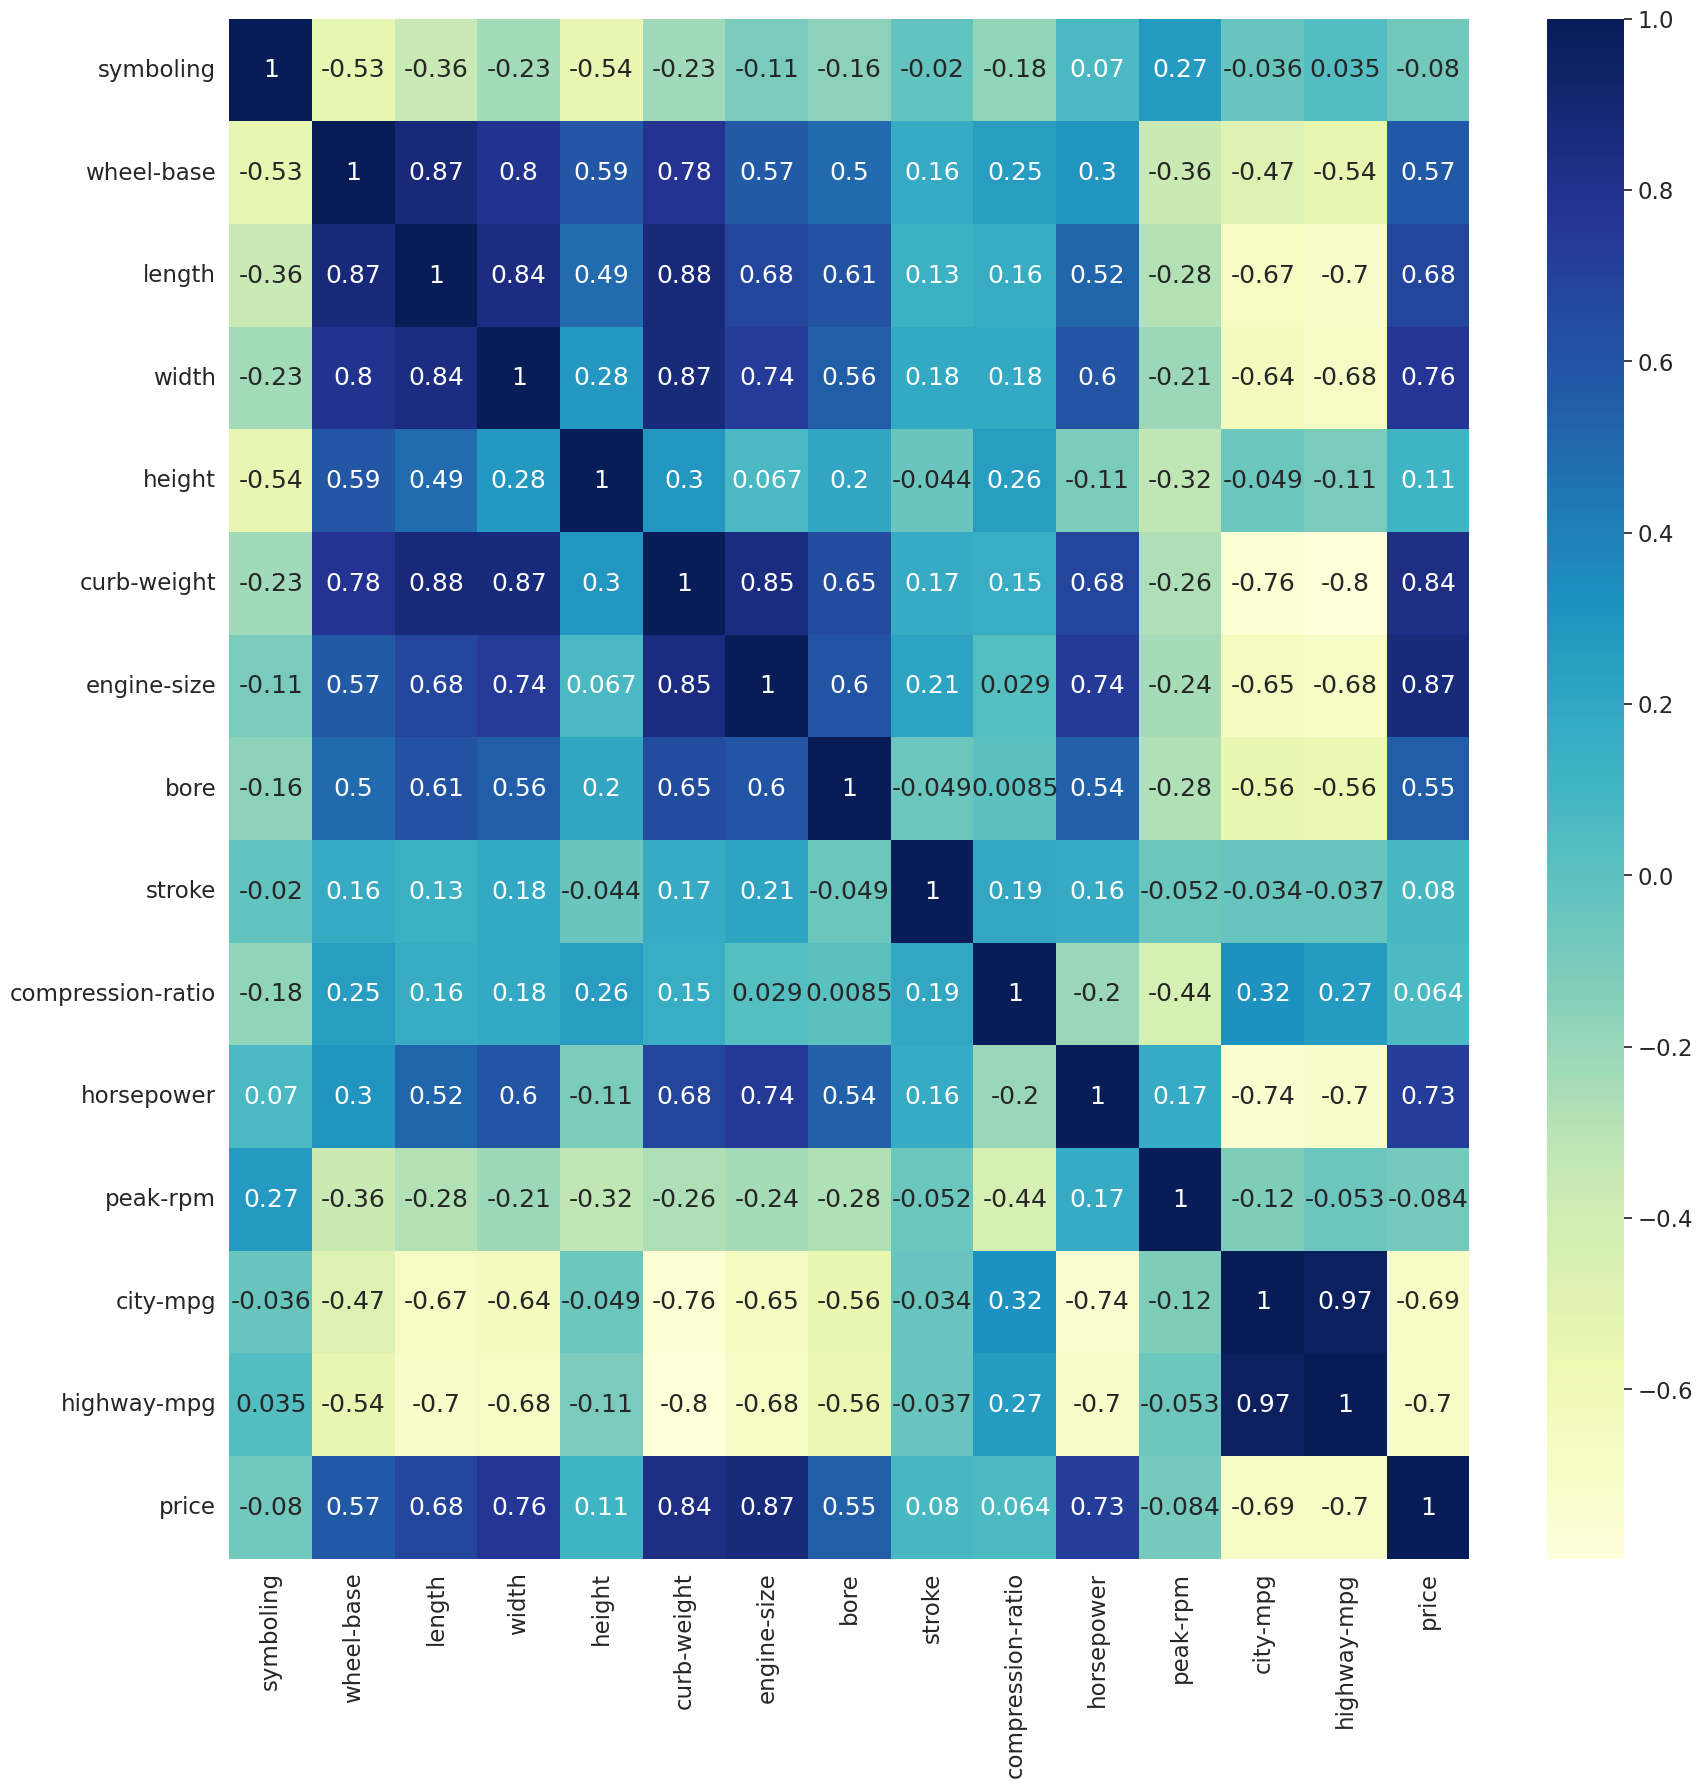

In [273]:
# Heatmap of all numerical features
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

### **Correlation of Numerical features with Price(Target variable)**

In [274]:
numeric_features = df.select_dtypes(include=[np.number])
cor = numeric_features.corr()
print(cor['price'].sort_values(ascending = False),'\n')

price                1.000000
engine-size          0.870751
curb-weight          0.835657
width                0.764977
horsepower           0.725481
length               0.678818
wheel-base           0.571784
bore                 0.549438
height               0.112421
stroke               0.079775
compression-ratio    0.064381
symboling           -0.080149
peak-rpm            -0.083675
city-mpg            -0.690580
highway-mpg         -0.698389
Name: price, dtype: float64 



* Price is highly (positively) correlated with wheelbase, length, width, curb-weight, engine-size, horsepower.
* There are many independent variables which are highly correlated: wheel-base, length, curb-weight, engine-size etc.. all are positively correlated.
* Price is negatively correlated to symboling, city-mpg and highway-mpg.

In [275]:
# Function to visualize Numerical features

def Scatter_Plot(cols):
  x = 1
  plt.figure(figsize=(20,8))
  for i in cols:
    plt.subplot(1,3,x)
    sns.scatterplot(x=i, y='price', data=df, color='blue')
    plt.title(f'{i} vs Price', fontweight= 'black', fontsize= 20, pad=20 )
    plt.tight_layout()
    x += 1

### **Visualizing [Length, Width, Weight] Feature**

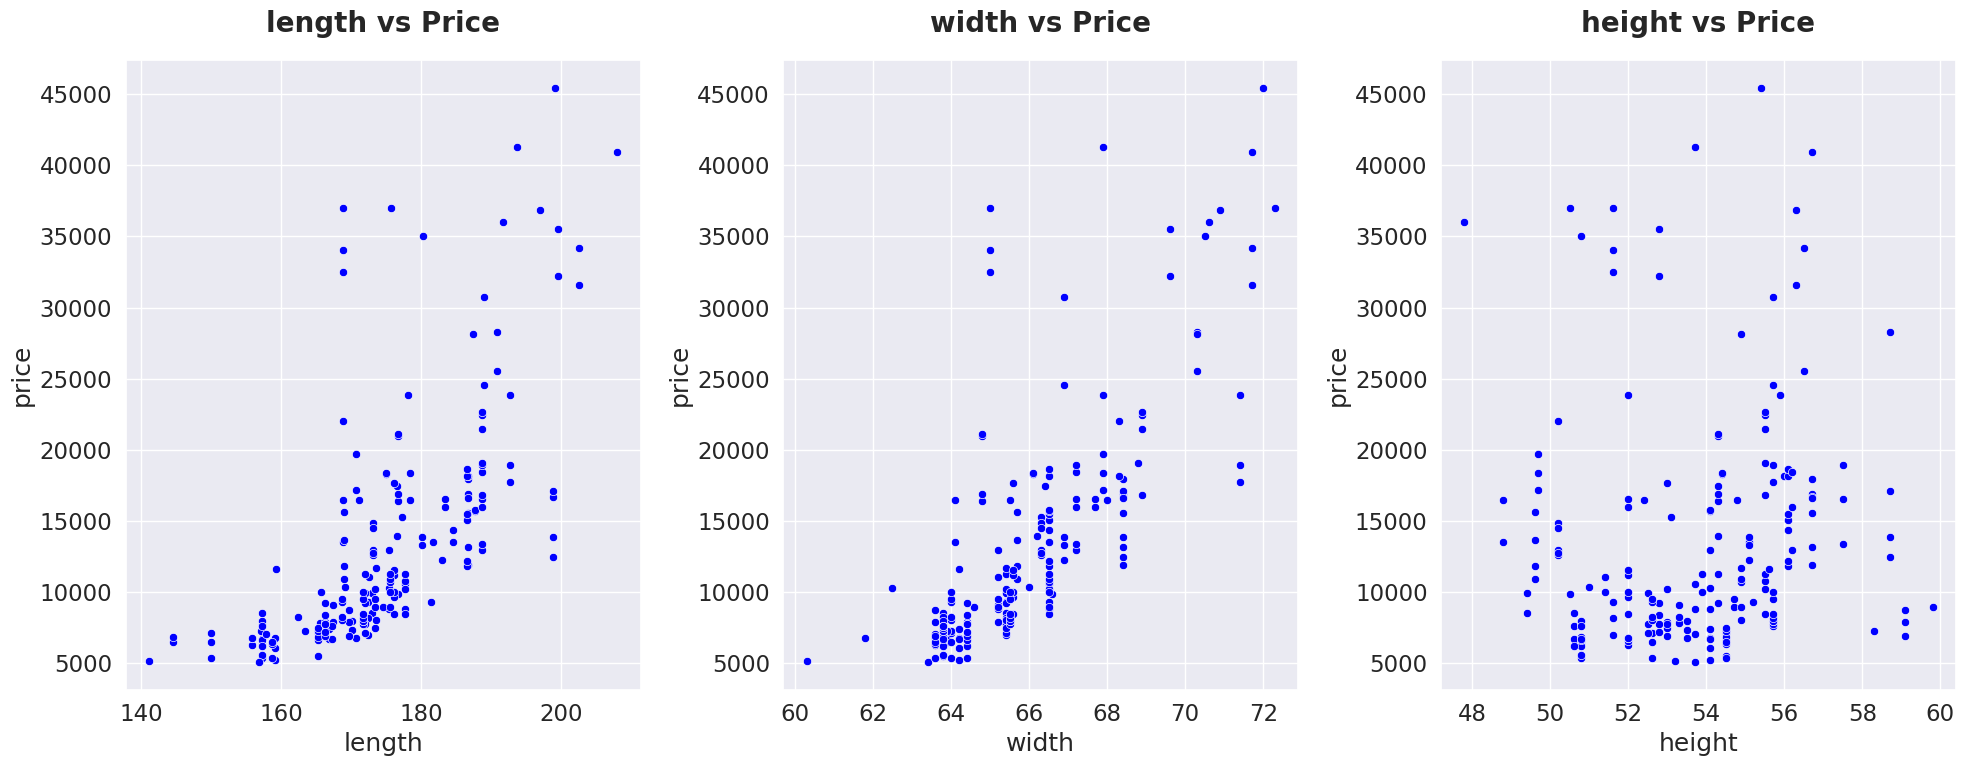

In [276]:
Scatter_Plot(['length', 'width', 'height'])

**Insights**

* We can clearly observe that length & width features are highly correlated with the price feature.
* So we can make an insight that with increment in length & width of the car there is an increment in price too.
* From length vs price we can't make any inference as the data-points are too scattered.
* Since CarHeight is not affecting Price We can drop this feature.

### **Visualizing [Curb-weight, Wheel-base, Engine-size] Feature**

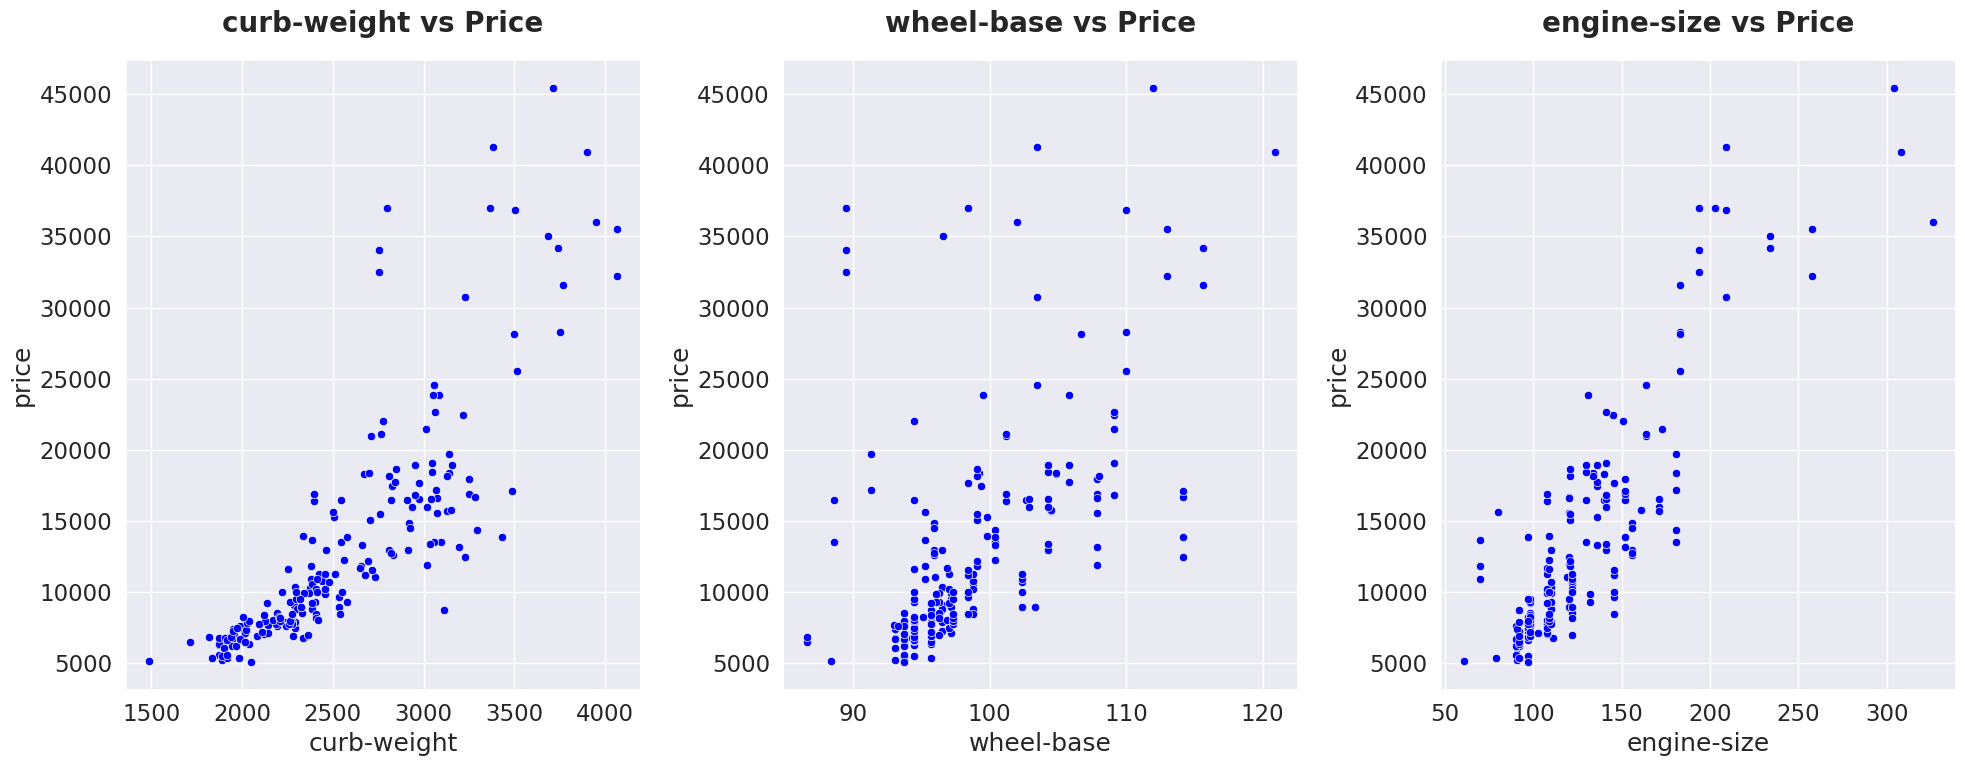

In [277]:
Scatter_Plot(['curb-weight', 'wheel-base', 'engine-size'])

**Insights**
* We can clearly observe that Curbweight is highly correlated with Price. So we can say with the increase in curbweight the price of cars increases.
* From wheelbase vs price we can say that they are not highly correlated but still there's a correlation. So with wheel base the price of the cars also increases.
* We can clearly observe that engine-size is highly correlated with price feature. So we can say with the increment in enginesize the price of the cars increases.

### **Visualizing [Bore, Stroke, Compression-ratio] Feature**

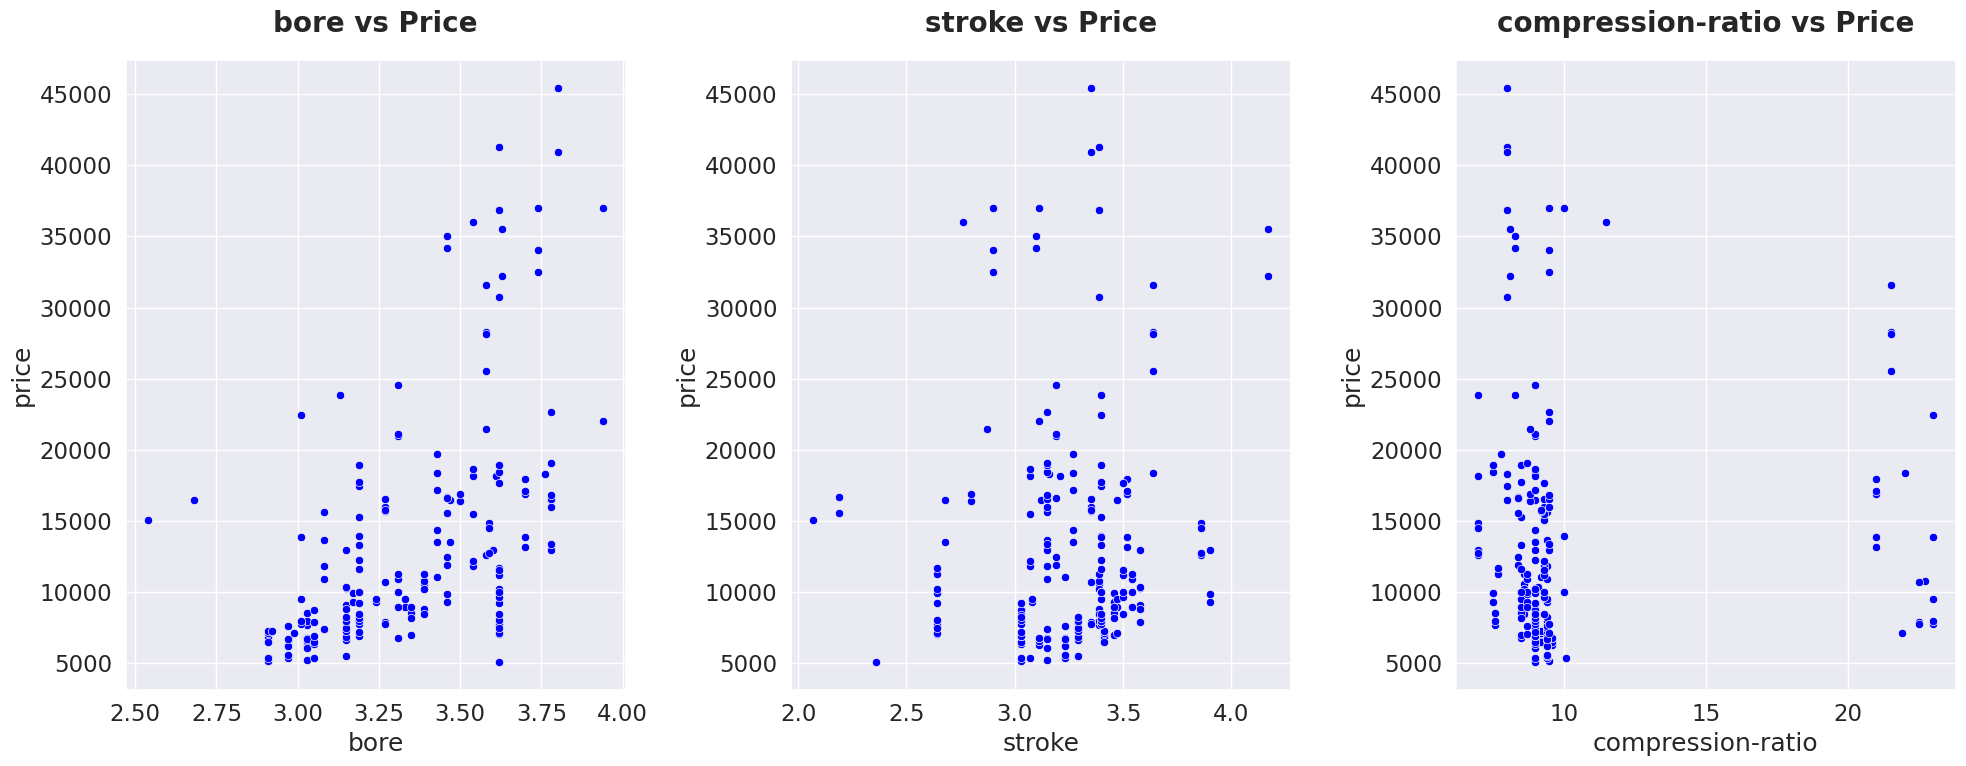

In [278]:
Scatter_Plot(['bore', 'stroke', 'compression-ratio'])

**Insights**

* From Bore vs Price we can observe that the feature is not highly correlated but still there's a correlation between the features. So we can say with increment in boreratio the price of cars increases.
* From Stroke vs Price we can't make any inference as the data-points are too scattered.
* Since Stroke is not affecting Price that much. We can drop this feature.
From Compressionratio vs Price visual we can't make any inference as the data-points are too scattered.

In [279]:
# Function to visualize Numerical features

def Scatter_Plot_(cols):
  x = 1
  plt.figure(figsize=(15,6))
  for i in cols:
    plt.subplot(1,2,x)
    sns.scatterplot(x=i, y='price', data=df, color='blue')
    plt.title(f'{i} vs Price', fontweight= 'black', fontsize= 20, pad=20 )
    plt.tight_layout()
    x += 1

### **Visualizing [Horsepower, Peak-rpm] Feature**

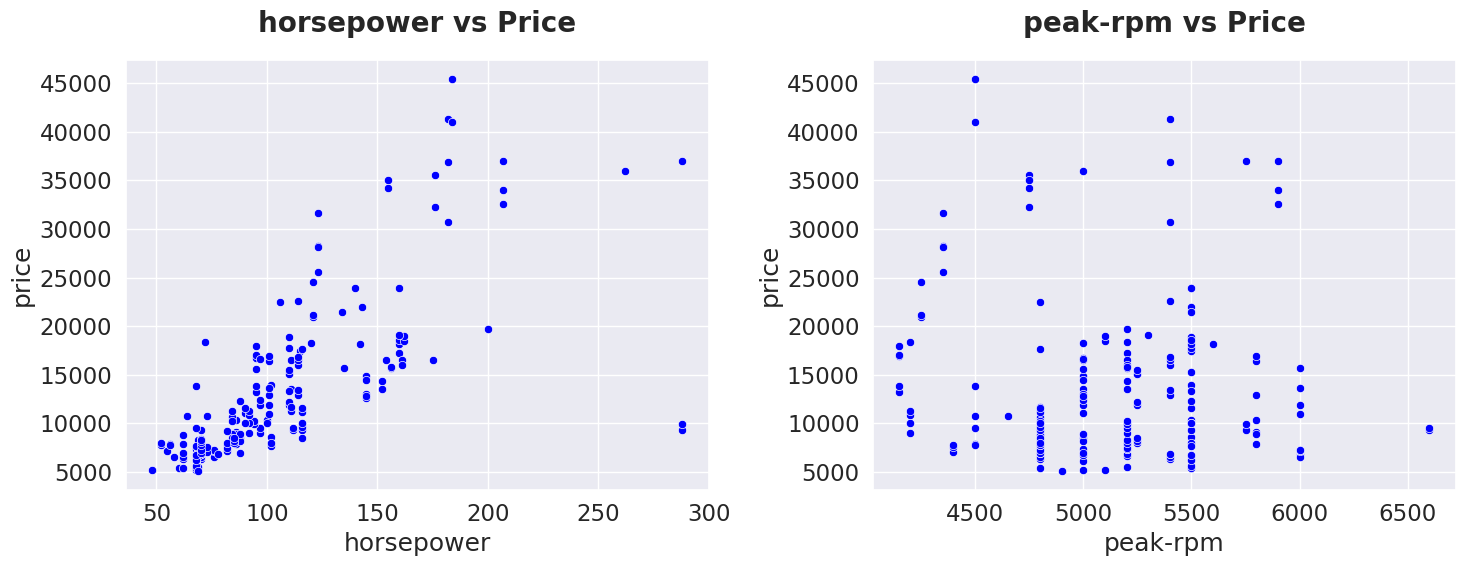

In [280]:
Scatter_Plot_(['horsepower', 'peak-rpm'])

**Insights**
* We can clearly observe that Horsepower is highly correlated with Price. So we can say with the increment in Horsepower the price of cars also increases.
* Peakrpm is not affecting price. So we can drop this features.

### **Visualizing [City-mpg, Highway-mpg] Feature**

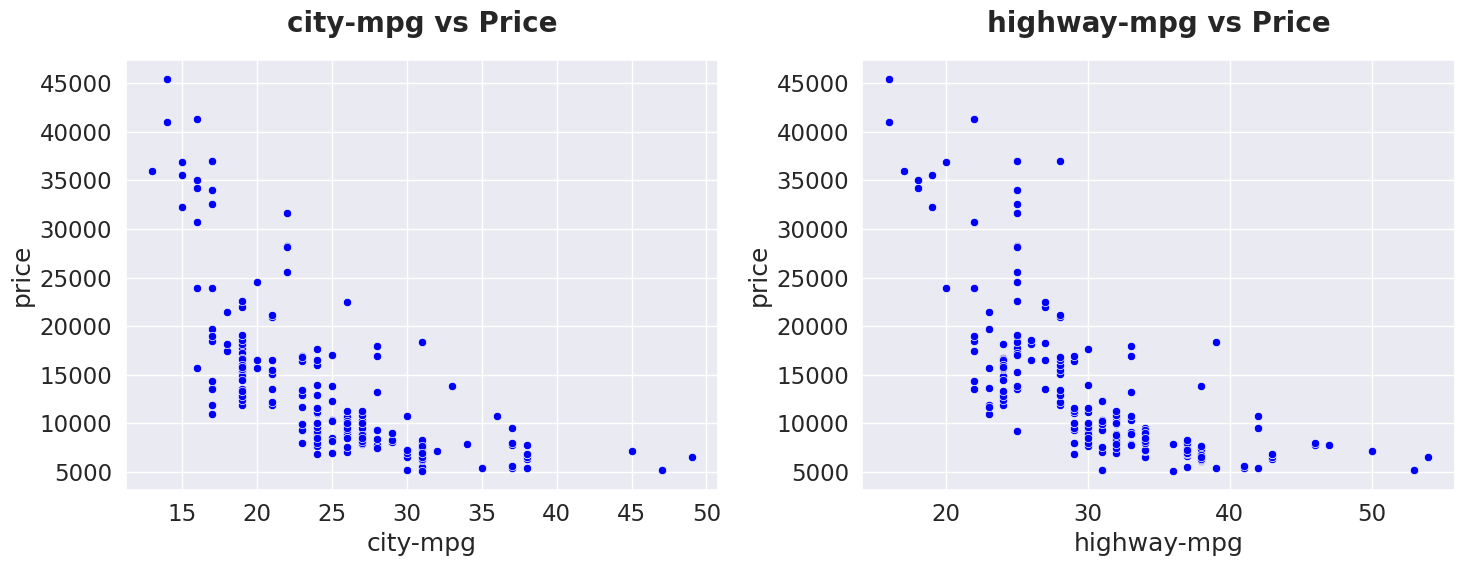

In [281]:
Scatter_Plot_(['city-mpg', 'highway-mpg'])

**Insights**

* We can clearly observe that Citympg & Highwaympg are having negative correlation with the price.
* So we can say that with the increment in citympg & Highwaympg the price of the cars decreases.
* So our both Citympg & Highwaympg are useful features for price prediction.

## **Analysis Report**

* Diesel cars are priced more than gas cars
* Cars with turbo aspiration engine are priced more than standard ones.
* Number of doors doesn't seem to have much effect on price.
* Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.
* Cars with Rear wheel drive have a higher price value.
* DOHCV and OHCV engine types are priced high.
* Eight and twelve cylinder cars have higher price.
* IDI and MPFI fuel system have higher price.
* When increasing cylinder number the price increasing
* When incresing engine size the price will increasing.

# **Feature Engineering**

## **Feature Selection (Recursive Feature Elimination)**

In [282]:
# feature_sel = df.copy()

In [283]:
# X1 = feature_sel.drop(['price'],axis=1)
# y1 = feature_sel['price']

In [284]:
# fs_rf = RandomForestRegressor()
# rfe = RFE(estimator=fs_rf, n_features_to_select=18, step=1)
# rfe = rfe.fit(X1,y1)
# print("Best 18 feature : ",X1.columns[rfe.support_])

## **Feature Extraction**

### **Deriving New Features From "make" Feature**

As we made an insight above that we can split the make into different price ranges.
* Low Range
* Medium Range
* High Range

Splitting into 3 ranges using car names

In [285]:
f = round(df.groupby(["make"])["price"].agg(["mean"]),2).T
f

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
mean,15498.33,18718.57,26118.75,6007.0,7875.44,8184.69,7850.75,34600.0,10652.88,33647.0,16503.0,9239.77,10415.67,15489.09,7963.43,32526.0,9595.0,15223.33,8541.25,9885.81,10077.5,18063.18


* We fetched the average price of each individual car companies
* Now we have to add this average values as a new column in our Dataframe.

In [286]:
df = df.merge(f.T,how="left",on="make")

In [287]:
bins = [0,10000,20000,40000]
car_bins = ['budget','medium','highend']
df['range'] = pd.cut(df['mean'], bins, right=False, labels=car_bins)

In [288]:
df.head(2)

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,mean,range
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,15498.33,medium
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,15498.33,medium


# **Data Preprocessing**

In [289]:
# Dataframe with the features has high corelation with Price/Target variable
# Columns significant in predicting the price

final_df = df[['fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
               'engine-type','num-of-cylinders','fuel-system','wheel-base','length',
               'width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg','price','range']]

In [290]:
final_df.head(2)

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg,price,range
0,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,27,21,13495.0,medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,88.6,168.8,64.1,2548,130,3.47,111,27,21,16500.0,medium


In [291]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   fuel-type         205 non-null    object  
 1   aspiration        205 non-null    object  
 2   num-of-doors      205 non-null    object  
 3   body-style        205 non-null    object  
 4   drive-wheels      205 non-null    object  
 5   engine-type       205 non-null    object  
 6   num-of-cylinders  205 non-null    object  
 7   fuel-system       205 non-null    object  
 8   wheel-base        205 non-null    float64 
 9   length            205 non-null    float64 
 10  width             205 non-null    float64 
 11  curb-weight       205 non-null    int64   
 12  engine-size       205 non-null    int64   
 13  bore              205 non-null    float64 
 14  horsepower        205 non-null    int64   
 15  highway-mpg       205 non-null    int64   
 16  city-mpg          205 non-

* We need to change the data type from object to numerical values

# **Encoding**

In [292]:
cat_columns = final_df.select_dtypes(exclude=[np.number])
cat_columns.head()

,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-type,num-of-cylinders,fuel-system,range
0,gas,std,two,convertible,rwd,dohc,four,mpfi,medium
1,gas,std,two,convertible,rwd,dohc,four,mpfi,medium
2,gas,std,two,hatchback,rwd,ohcv,six,mpfi,medium
3,gas,std,four,sedan,fwd,ohc,four,mpfi,medium
4,gas,std,four,sedan,4wd,ohc,five,mpfi,medium


In [293]:
final_df = pd.get_dummies(columns=['fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-type','num-of-cylinders','fuel-system','range'],data=final_df)

before ss

In [294]:
bef_ss = final_df.copy()

In [295]:
M = bef_ss.drop(['price'],axis=1)
N = bef_ss['price']

In [296]:
M.shape

(205, 48)

In [297]:
N.shape

(205,)

In [298]:
X_train_s, X_test_s ,y_train_s ,y_test_s  = train_test_split(M, N, test_size=0.2, random_state=42)

In [299]:
# Object of all imported Algorithms

Linear_Regression = LinearRegression()
Decision_Tree_Regressor = DecisionTreeRegressor()
KNeighbors_Regressor = KNeighborsRegressor()
Random_Forest_Regressor = RandomForestRegressor()
Gradient_Boosting_Regressor = GradientBoostingRegressor()
AdaBoost_Regressor = AdaBoostRegressor()


In [300]:
# Function to built model
training_r2_s_score = []
testing_r2_s_score= []

training_root_mean_squared_error_s = []
testing_root_mean_squared_error_s = []

training_mean_absolute_error_s_ = []
testing_mean_absolute_error_s_ = []

def final_model_s(mod):
  mod.fit(X_train_s, y_train_s)
  X_train_s_predicted = mod.predict(X_train_s)
  X_test_s_predicted = mod.predict(X_test_s)

  a = r2_score(y_train_s, X_train_s_predicted)*100    # r2_score
  b = r2_score(y_test_s, X_test_s_predicted)*100
  training_r2_s_score.append(a)
  testing_r2_s_score.append(b)

  ss_mse1 = mean_squared_error(y_train_s, X_train_s_predicted)*100 # mean_squared_error
  c = np.sqrt(ss_mse1)
  ss_mse2 = mean_squared_error(y_test_s, X_test_s_predicted)*100
  d = np.sqrt(ss_mse2)
  training_root_mean_squared_error_s.append(c)
  testing_root_mean_squared_error_s.append(d)

  e = mean_absolute_error(y_train_s, X_train_s_predicted)*100  # mean_absolute_error
  f = mean_absolute_error(y_test_s, X_test_s_predicted)*100
  training_mean_absolute_error_s_.append(e)
  testing_mean_absolute_error_s_.append(f)

  print(f"r2_Score of {mod} final model on Training Data before StandardScaler is:",a)
  print(f"r2_Score of {mod} final model on Testing Data after StandardScaler is:",b)
  print('-------------------------------------------------------------------------------------------------------------------------')
  print(f"root_mean_squared_error of {mod} final model on Training Data after StandardScaler is:",c)
  print(f"root_mean_squared_error of {mod} final model on Testing Data after StandardScaler is:",d)
  print('-------------------------------------------------------------------------------------------------------------------------')
  print(f"mean_absolute_error of {mod} final model on Training Data after StandardScaler is:",e)
  print(f"mean_absolute_error of {mod} final model on Testing Data after StandardScaler is:",f)



In [301]:
final_model_s(Linear_Regression)

r2_Score of LinearRegression() final model on Training Data before StandardScaler is: 95.48388557790318
r2_Score of LinearRegression() final model on Testing Data after StandardScaler is: 86.5559741760792
-------------------------------------------------------------------------------------------------------------------------
root_mean_squared_error of LinearRegression() final model on Training Data after StandardScaler is: 16627.257268378413
root_mean_squared_error of LinearRegression() final model on Testing Data after StandardScaler is: 33138.981649959744
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of LinearRegression() final model on Training Data after StandardScaler is: 125101.65370591207
mean_absolute_error of LinearRegression() final model on Testing Data after StandardScaler is: 236216.35157650153


In [302]:
final_model_s(Decision_Tree_Regressor)

r2_Score of DecisionTreeRegressor() final model on Training Data before StandardScaler is: 99.86884537953122
r2_Score of DecisionTreeRegressor() final model on Testing Data after StandardScaler is: 86.397999809077
-------------------------------------------------------------------------------------------------------------------------
root_mean_squared_error of DecisionTreeRegressor() final model on Training Data after StandardScaler is: 2833.543900592572
root_mean_squared_error of DecisionTreeRegressor() final model on Testing Data after StandardScaler is: 33333.11325130598
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() final model on Training Data after StandardScaler is: 6466.463414634147
mean_absolute_error of DecisionTreeRegressor() final model on Testing Data after StandardScaler is: 209380.48780487807


In [303]:
final_model_s(KNeighbors_Regressor)

r2_Score of KNeighborsRegressor() final model on Training Data before StandardScaler is: 86.65121724653594
r2_Score of KNeighborsRegressor() final model on Testing Data after StandardScaler is: 77.06619465977796
-------------------------------------------------------------------------------------------------------------------------
root_mean_squared_error of KNeighborsRegressor() final model on Training Data after StandardScaler is: 28586.368031701797
root_mean_squared_error of KNeighborsRegressor() final model on Testing Data after StandardScaler is: 43282.521210547144
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() final model on Training Data after StandardScaler is: 189147.92682926828
mean_absolute_error of KNeighborsRegressor() final model on Testing Data after StandardScaler is: 267657.56097560975


In [304]:
final_model_s(Random_Forest_Regressor)

r2_Score of RandomForestRegressor() final model on Training Data before StandardScaler is: 98.88760695331483
r2_Score of RandomForestRegressor() final model on Testing Data after StandardScaler is: 94.96212261979056
-------------------------------------------------------------------------------------------------------------------------
root_mean_squared_error of RandomForestRegressor() final model on Training Data after StandardScaler is: 8252.15317888064
root_mean_squared_error of RandomForestRegressor() final model on Testing Data after StandardScaler is: 20286.087104514583
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() final model on Training Data after StandardScaler is: 54419.35119047618
mean_absolute_error of RandomForestRegressor() final model on Testing Data after StandardScaler is: 139064.85975609755


In [305]:
final_model_s(Gradient_Boosting_Regressor)

r2_Score of GradientBoostingRegressor() final model on Training Data before StandardScaler is: 99.33322662283737
r2_Score of GradientBoostingRegressor() final model on Testing Data after StandardScaler is: 92.54106131287477
-------------------------------------------------------------------------------------------------------------------------
root_mean_squared_error of GradientBoostingRegressor() final model on Training Data after StandardScaler is: 6388.917404525983
root_mean_squared_error of GradientBoostingRegressor() final model on Testing Data after StandardScaler is: 24683.856227480745
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() final model on Training Data after StandardScaler is: 47212.00099447325
mean_absolute_error of GradientBoostingRegressor() final model on Testing Data after StandardScaler is: 177181.31011062447


In [306]:
final_model_s(AdaBoost_Regressor)

r2_Score of AdaBoostRegressor() final model on Training Data before StandardScaler is: 96.28716974966636
r2_Score of AdaBoostRegressor() final model on Testing Data after StandardScaler is: 90.4509758837624
-------------------------------------------------------------------------------------------------------------------------
root_mean_squared_error of AdaBoostRegressor() final model on Training Data after StandardScaler is: 15076.158512937525
root_mean_squared_error of AdaBoostRegressor() final model on Testing Data after StandardScaler is: 27928.9098779109
-------------------------------------------------------------------------------------------------------------------------
mean_absolute_error of AdaBoostRegressor() final model on Training Data after StandardScaler is: 126729.6720462203
mean_absolute_error of AdaBoostRegressor() final model on Testing Data after StandardScaler is: 213978.00396367133


# **Feature Scaling**

In [307]:
ss = StandardScaler()

In [308]:
num_columns = final_df.select_dtypes(include=[np.number])
num_columns.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,range_budget,range_medium,range_highend
0,88.6,168.8,64.1,2548,130,3.47,111,27,21,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,88.6,168.8,64.1,2548,130,3.47,111,27,21,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,94.5,171.2,65.5,2823,152,2.68,154,26,19,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,99.8,176.6,66.2,2337,109,3.19,102,30,24,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,99.4,176.6,66.4,2824,136,3.19,115,22,18,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [309]:
ss_columns = ['wheel-base','length','width','curb-weight','engine-size','bore','horsepower','highway-mpg','city-mpg']
final_df[ss_columns] = ss.fit_transform(final_df[ss_columns])

In [310]:
final_df.head()

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,highway-mpg,city-mpg,price,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,num-of-doors_four,num-of-doors_two,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,num-of-cylinders_eight,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,range_budget,range_medium,range_highend
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.532789,0.114182,-0.546059,-0.646553,13495.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.532789,0.114182,-0.546059,-0.646553,16500.0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.367552,1.105818,-0.691627,-0.953012,16500.0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.495180,-0.093370,-0.109354,-0.186865,13950.0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.495180,0.206427,-1.273900,-1.106241,17450.0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# **Splitting**

In [311]:
X = final_df.drop(['price'],axis=1)
y = final_df['price']

In [312]:
X.shape

(205, 48)

In [313]:
y.shape

(205,)

In [314]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [315]:
print('X_train shape -->', X_train.shape)
print('X_test shape -->', X_test.shape)
print('y_train shape -->', y_train.shape)
print('y_test shape -->', y_test.shape)

X_train shape --> (164, 48)
X_test shape --> (41, 48)
y_train shape --> (164,)
y_test shape --> (41,)


In [316]:
# Object of all imported Algorithms

Linear_Regression = LinearRegression()
Decision_Tree_Regressor = DecisionTreeRegressor()
KNeighbors_Regressor = KNeighborsRegressor()
Random_Forest_Regressor = RandomForestRegressor()
Gradient_Boosting_Regressor = GradientBoostingRegressor()
AdaBoost_Regressor = AdaBoostRegressor()


In [317]:
# Function to built model

training_r2_score = []
testing_r2_score= []

training_root_mean_squared_error = []
testing_root_mean_squared_error = []

training_mean_absolute_error = []
testing_mean_absolute_error = []

def final_model(mod):
  mod.fit(X_train, y_train)
  X_train_predicted = mod.predict(X_train)
  X_test_predicted = mod.predict(X_test)

  a = r2_score(y_train, X_train_predicted)*100    # r2_score
  b = r2_score(y_test, X_test_predicted)*100
  training_r2_score.append(a)
  testing_r2_score.append(b)

  mse1 = mean_squared_error(y_train, X_train_predicted) # mean_squared_error
  c = np.sqrt(mse1)
  mse2 = mean_squared_error(y_test, X_test_predicted)
  d = np.sqrt(mse2)
  training_root_mean_squared_error.append(c)
  testing_root_mean_squared_error.append(d)

  e = mean_absolute_error(y_train, X_train_predicted) # mean_absolute_error
  f = mean_absolute_error(y_test, X_test_predicted)
  training_mean_absolute_error.append(e)
  testing_mean_absolute_error.append(f)

  print(f"r2_Score of {mod} final model on Training Data is:",a)
  print(f"r2_Score of {mod} final model on Testing Data is:",b)
  print('---------------------------------------------------------------------------------------------------------')
  print(f"root_mean_squared_error of {mod} final model on Training Data is:",c)
  print(f"root_mean_squared_error of {mod} final model on Testing Data is:",d)
  print('---------------------------------------------------------------------------------------------------------')
  print(f"mean_absolute_error of {mod} final model on Training Data is:",e)
  print(f"mean_absolute_error of {mod} final model on Testing Data is:",f)



## **Linear Regression**

In [318]:
final_model(Linear_Regression)

r2_Score of LinearRegression() final model on Training Data is: 95.48388557790318
r2_Score of LinearRegression() final model on Testing Data is: 86.55597417607923
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of LinearRegression() final model on Training Data is: 1662.7257268378412
root_mean_squared_error of LinearRegression() final model on Testing Data is: 3313.898164995973
---------------------------------------------------------------------------------------------------------
mean_absolute_error of LinearRegression() final model on Training Data is: 1251.0165370591208
mean_absolute_error of LinearRegression() final model on Testing Data is: 2362.163515765016


## **DecisionTreeRegressor**

In [319]:
final_model(Decision_Tree_Regressor)

r2_Score of DecisionTreeRegressor() final model on Training Data is: 99.86884537953122
r2_Score of DecisionTreeRegressor() final model on Testing Data is: 87.89579915064442
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of DecisionTreeRegressor() final model on Training Data is: 283.3543900592572
root_mean_squared_error of DecisionTreeRegressor() final model on Testing Data is: 3144.4344832596203
---------------------------------------------------------------------------------------------------------
mean_absolute_error of DecisionTreeRegressor() final model on Training Data is: 64.66463414634147
mean_absolute_error of DecisionTreeRegressor() final model on Testing Data is: 2074.512195121951


## **KNeighbors Regressor**

In [320]:
final_model(KNeighbors_Regressor)

r2_Score of KNeighborsRegressor() final model on Training Data is: 90.19154596379676
r2_Score of KNeighborsRegressor() final model on Testing Data is: 75.15071162562252
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of KNeighborsRegressor() final model on Training Data is: 2450.4081527618923
root_mean_squared_error of KNeighborsRegressor() final model on Testing Data is: 4505.380422907921
---------------------------------------------------------------------------------------------------------
mean_absolute_error of KNeighborsRegressor() final model on Training Data is: 1571.7487804878049
mean_absolute_error of KNeighborsRegressor() final model on Testing Data is: 2829.609756097561


## **Random Forest Regressor**

In [321]:
final_model(Random_Forest_Regressor)

r2_Score of RandomForestRegressor() final model on Training Data is: 98.84550734100804
r2_Score of RandomForestRegressor() final model on Testing Data is: 94.9309342977268
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of RandomForestRegressor() final model on Training Data is: 840.685846768156
root_mean_squared_error of RandomForestRegressor() final model on Testing Data is: 2034.8783432969906
---------------------------------------------------------------------------------------------------------
mean_absolute_error of RandomForestRegressor() final model on Training Data is: 559.1363015389084
mean_absolute_error of RandomForestRegressor() final model on Testing Data is: 1410.499105691057


## **Gradient Boosting Regressor**

In [322]:
final_model(Gradient_Boosting_Regressor)

r2_Score of GradientBoostingRegressor() final model on Training Data is: 99.33322662283737
r2_Score of GradientBoostingRegressor() final model on Testing Data is: 92.56715481237357
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of GradientBoostingRegressor() final model on Training Data is: 638.8917404525984
root_mean_squared_error of GradientBoostingRegressor() final model on Testing Data is: 2464.064280894082
---------------------------------------------------------------------------------------------------------
mean_absolute_error of GradientBoostingRegressor() final model on Training Data is: 472.12000994473243
mean_absolute_error of GradientBoostingRegressor() final model on Testing Data is: 1760.5310957774163


## **AdaBoost Regressor**

In [323]:
final_model(AdaBoost_Regressor)

r2_Score of AdaBoostRegressor() final model on Training Data is: 96.59277751326633
r2_Score of AdaBoostRegressor() final model on Testing Data is: 91.65065383455601
---------------------------------------------------------------------------------------------------------
root_mean_squared_error of AdaBoostRegressor() final model on Training Data is: 1444.2367597179739
root_mean_squared_error of AdaBoostRegressor() final model on Testing Data is: 2611.56430031623
---------------------------------------------------------------------------------------------------------
mean_absolute_error of AdaBoostRegressor() final model on Training Data is: 1177.3105101862373
mean_absolute_error of AdaBoostRegressor() final model on Testing Data is: 2009.548103720052


# **Model Performance Comparision**

In [324]:
all_models = ['Linear_Regression', 'Decision_Tree_Regressor', 'KNeighbors_Regressor', 'Random_Forest_Regressor', 'Gradient_Boosting_Regressor', 'AdaBoost_Regressor']

###  **Performance Before Standard Scaling**

In [325]:
comparision_df_ss = pd.DataFrame({'Algorithms':all_models,
                               'Training_score':training_r2_s_score,
                               'Test_score':testing_r2_s_score})

In [326]:
comparision_df_ss

,Algorithms,Training_score,Test_score
0,Linear_Regression,95.483886,86.555974
1,Decision_Tree_Regressor,99.868845,86.398000
2,KNeighbors_Regressor,86.651217,77.066195
3,Random_Forest_Regressor,98.887607,94.962123
4,Gradient_Boosting_Regressor,99.333227,92.541061
5,AdaBoost_Regressor,96.287170,90.450976


Text(0.5, 1.0, 'Algorithms Performance before StandardScaler')

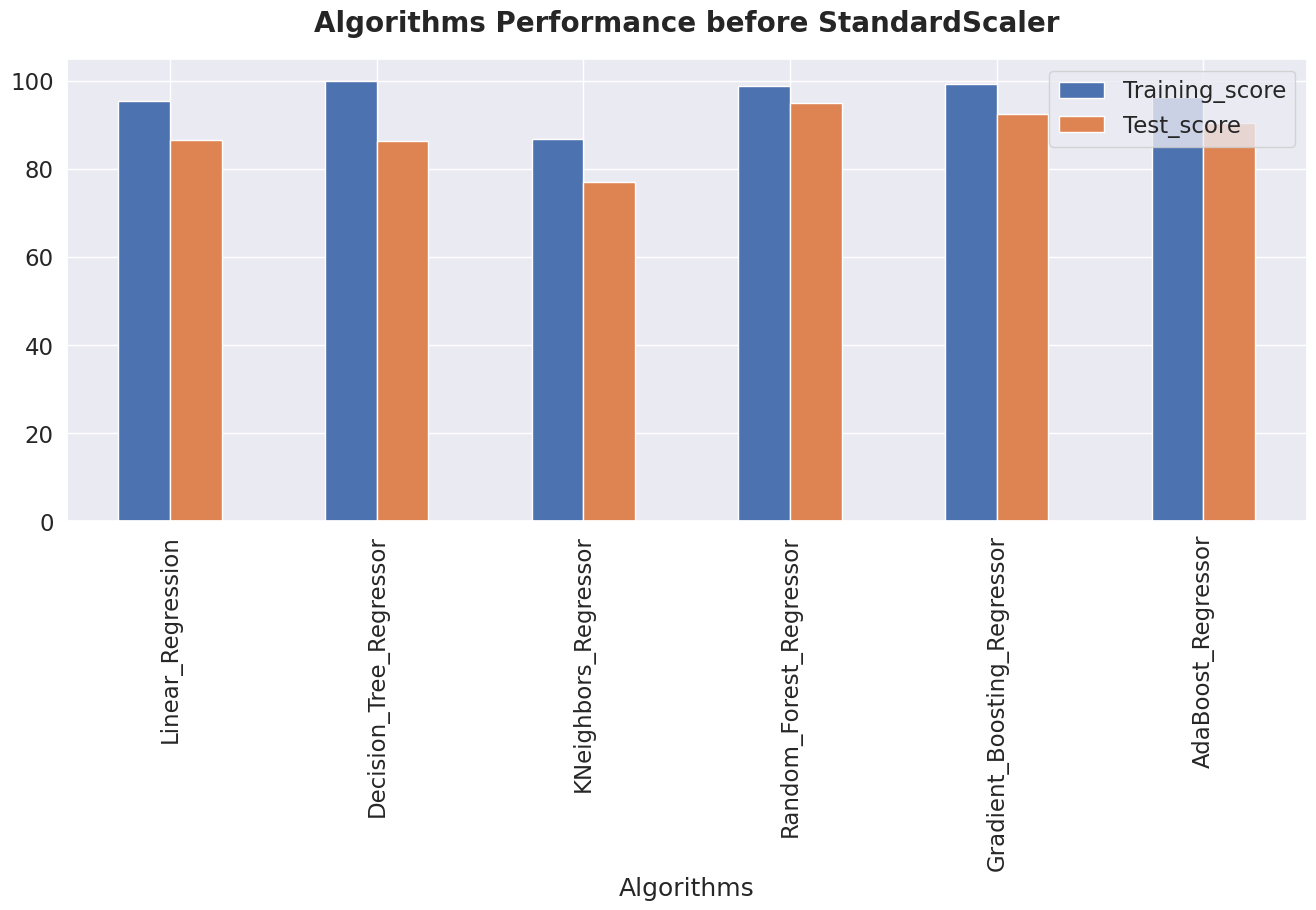

In [327]:
a1 = comparision_df_ss.plot(x='Algorithms',y=['Training_score','Test_score'], kind='bar',figsize=(16,6))
a1.set_title("Algorithms Performance before StandardScaler", fontweight='bold', fontsize=20, pad=20)

### **Performance After Standard Scaling**

In [328]:
comparision_df = pd.DataFrame({'Algorithms':all_models,
                               'Training_score':training_r2_score,
                               'Test_score':testing_r2_score})

In [329]:
comparision_df

,Algorithms,Training_score,Test_score
0,Linear_Regression,95.483886,86.555974
1,Decision_Tree_Regressor,99.868845,87.895799
2,KNeighbors_Regressor,90.191546,75.150712
3,Random_Forest_Regressor,98.845507,94.930934
4,Gradient_Boosting_Regressor,99.333227,92.567155
5,AdaBoost_Regressor,96.592778,91.650654


Text(0.5, 1.0, 'Algorithms Performance after StandardScaler')

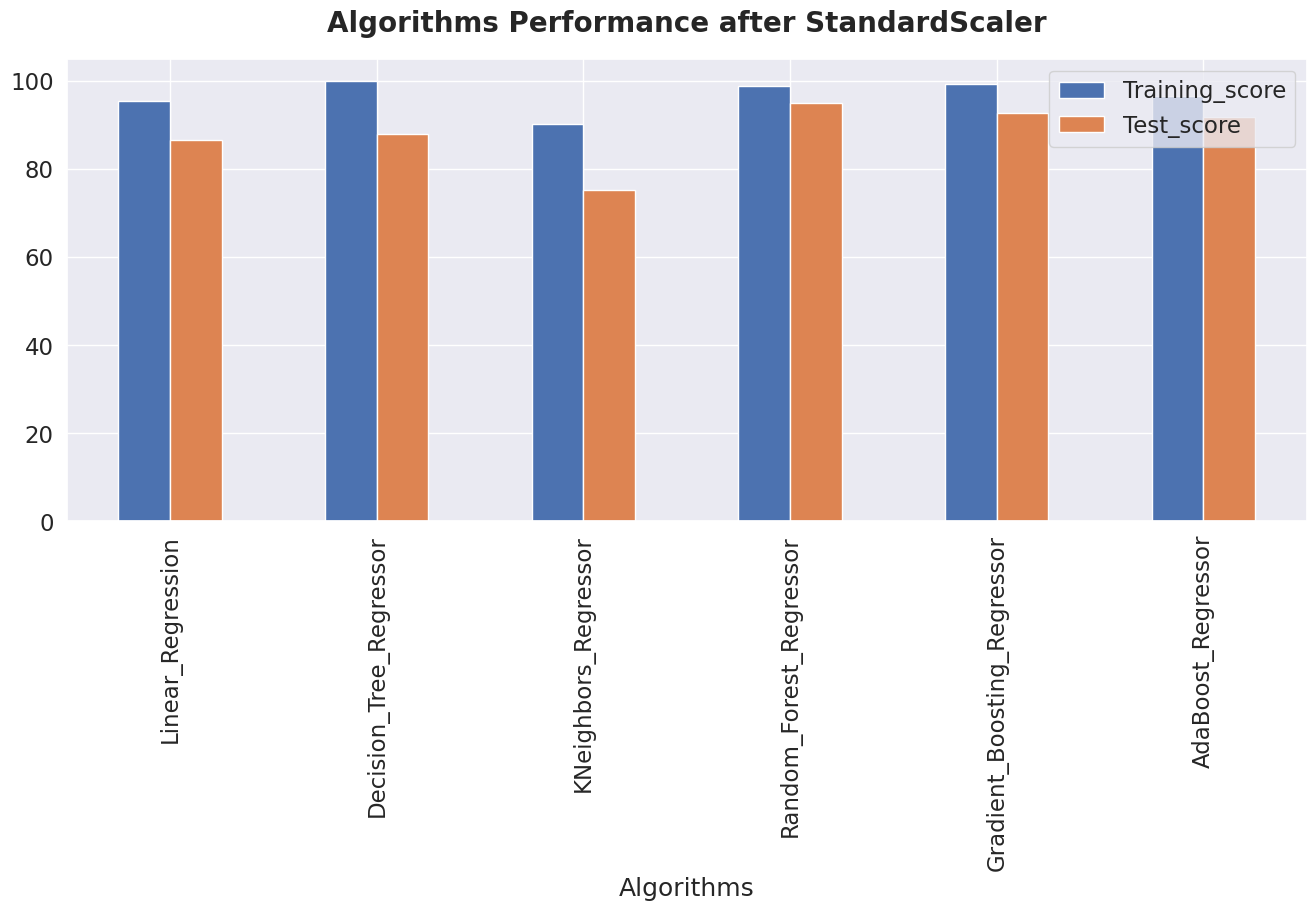

In [330]:
a1 = comparision_df.plot(x='Algorithms',y=['Training_score','Test_score'], kind='bar',figsize=(16,6))
a1.set_title("Algorithms Performance after StandardScaler", fontweight='bold', fontsize=20, pad=20)

**Observation**
* Highest performance was given by Random Forest Model around 95%. 
* Gradient_Boosting_Regressor & AdaBoost_Regressor Model performance was also good.
* So we can use any of these three Models for predicting the price of car in future

# **Hyper parameter Tuning**

In [331]:
random_grid = {'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1,3,5,7,9,11,12],
               'min_samples_split': [2,5,10],
               'min_samples_leaf': [1,2,4],
               'bootstrap':[True,False]}

In [332]:
rs = RandomizedSearchCV(Random_Forest_Regressor,random_grid)
rs.fit(X_train,y_train)
rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 11,
 'bootstrap': False}

In [333]:
print(rs.best_estimator_)

RandomForestRegressor(bootstrap=False, max_depth=11, max_features='sqrt',
                      min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200)


In [334]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (164, 48)
y_train shape: (164,)
X_test shape: (41, 48)
y_test shape: (41,)


In [335]:
rfg = RandomForestRegressor(max_depth=7, max_features='sqrt', min_samples_leaf=2,n_estimators=400)
rfg.fit(X_train,y_train) 
y_pred = rfg.predict(X_test)

rmse = mean_squared_error(y_test,y_pred)
print("R2_score :",r2_score(y_test,y_pred)) 
print("Mean Absolute Error:",np.sqrt(rmse)) 
print("Mean Squared Error ",mean_squared_error(y_test,y_pred))

R2_score : 0.9210505065595912
Mean Absolute Error: 2539.5055333960736
Mean Squared Error  6449088.354149276


# **Feature Importance**

In [336]:
feature_importances = pd.DataFrame(Random_Forest_Regressor.feature_importances_,
                                   index = X_train.columns,
                                   columns = ['importance']).sort_values('importance',ascending=False)

feature_importances.head(7)

,importance
engine-size,0.636267
curb-weight,0.231051
highway-mpg,0.045708
range_highend,0.016956
width,0.012526
horsepower,0.012262
length,0.010938


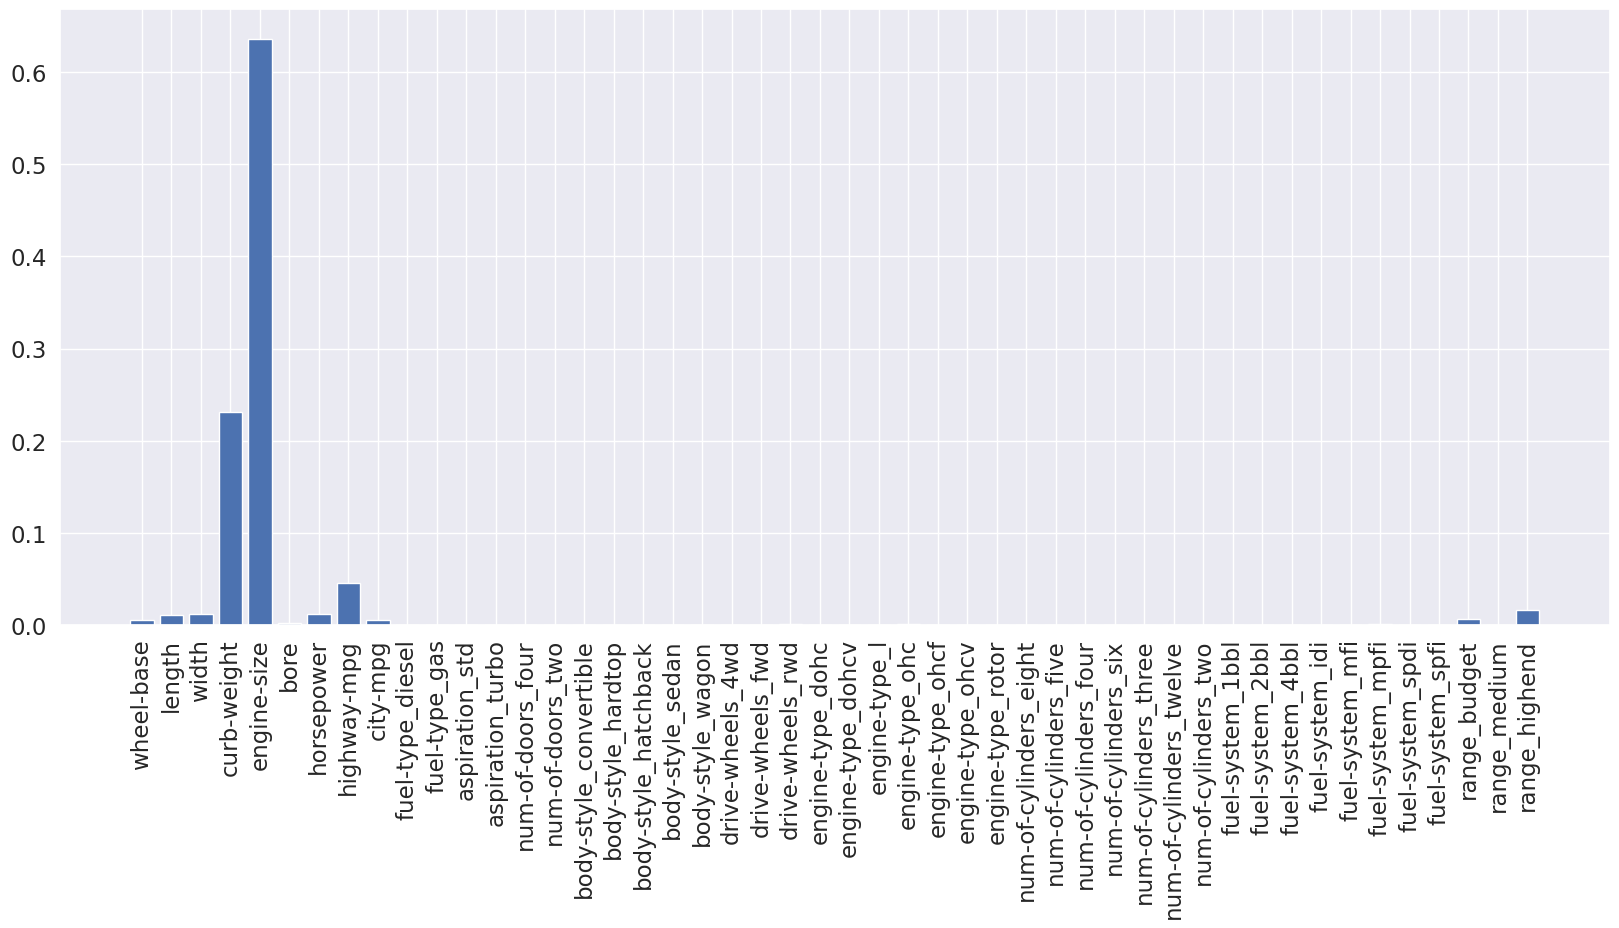

In [337]:
feature_names = X_train.columns
importances = Random_Forest_Regressor.feature_importances_
plt.bar(feature_names, importances)
plt.rcParams["figure.figsize"] = (20,8)
plt.xticks(rotation=90)
plt.show()


**Based on the Random Forest Regressor:**
* engine-size
* curb-weight
* highway-mpg
* horsepower
* range_highend
* width

has highest importance scores.

# **Conclusion**

## **Car Price Prediction with Machine Learning.**
**Key-Points**
* First, we did the Basic Understanding of Data.
* Then we performed Data Cleaning to make the raw data more usable for analysis.
* We identified and handled missing values and other data inconsistencies during the data cleaning process.
* we conducted Exploratory Data Analysis(EDA) to gain insights from the data.
* Feature Engineering: We performed feature engineering to create new features or transform existing ones that could improve the predictive power of our model.
* Data Preprocessing: We prepared the data for model training and testing by encoding categorical variables, scaling numerical features, and splitting the dataset into training and testing sets.
* We trained our model using different Machine Learning Algorithms, such as Random Forest Regression,Gradient Boosting Regression,Adaboost Regression,Decision Tree Regression etc.. to predict car prices.
* Finally, we evaluated the model's performance and achieved around 95% accuracy with the Random Forest Regression model.
* Based on the high accuracy achieved, we can utilize this model for predicting the price of a car in the future.
* Feature Importance: We analyzed the importance of each feature in the prediction of car prices. This analysis helps in understanding the key factors that contribute the most to the price variation.